<h1>Run and analyze dual-storage SymEnergy model<span class="tocSkip"></span></h1>

Companion notebook #2 of 4 of the paper 
>M.C.Soini *et al.*, **On the market displacement of incumbent grid-connected electricity storage by more efficient storage**.

The notebook is published as a static html file and as a Jupyter notebook file; please find the notebook file [here](https://github.com/mcsoini/storage_displacement_supplementary/blob/master/02_SymEnergy_double_storage_model.ipynb).

In this notebook all dual-storage SymEnergy model results are generated and analyzed.

**Instructions**
* Install dependencies as defined in the [README](https://github.com/mcsoini/storage_displacement_supplementary/blob/master/README.md)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Build,-solve,-and-evaluate-2-storage-SymEnergy-model" data-toc-modified-id="Build,-solve,-and-evaluate-2-storage-SymEnergy-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build, solve, and evaluate 2-storage SymEnergy model</a></span></li><li><span><a href="#Plot-of-energy-balances-as-a-function-of-the-new-storage-energy-capacity-(figure-5)" data-toc-modified-id="Plot-of-energy-balances-as-a-function-of-the-new-storage-energy-capacity-(figure-5)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot of energy balances as a function of the new storage energy capacity (figure 5)</a></span></li><li><span><a href="#Analyze-dependencies-PHS-$\Longleftrightarrow$-BAT" data-toc-modified-id="Analyze-dependencies-PHS-$\Longleftrightarrow$-BAT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyze dependencies PHS $\Longleftrightarrow$ BAT</a></span><ul class="toc-item"><li><span><a href="#Analyze-results-in-terms-of-storage-interdependencies" data-toc-modified-id="Analyze-results-in-terms-of-storage-interdependencies-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analyze results in terms of storage interdependencies</a></span></li><li><span><a href="#Binary-ec-impact-map" data-toc-modified-id="Binary-ec-impact-map-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Binary <code>ec</code> impact map</a></span></li><li><span><a href="#Overview-heatmap-(figures-6-and-8a-d)" data-toc-modified-id="Overview-heatmap-(figures-6-and-8a-d)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Overview heatmap (figures 6 and 8a-d)</a></span><ul class="toc-item"><li><span><a href="#Save-as-csv" data-toc-modified-id="Save-as-csv-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Save as csv</a></span></li><li><span><a href="#Check-idx" data-toc-modified-id="Check-idx-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Check idx</a></span></li><li><span><a href="#Check-operational-patterns" data-toc-modified-id="Check-operational-patterns-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Check operational patterns</a></span></li></ul></li></ul></li><li><span><a href="#Identify-charging/discharging-patterns-for-relevant-clusters" data-toc-modified-id="Identify-charging/discharging-patterns-for-relevant-clusters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Identify charging/discharging patterns for relevant clusters</a></span><ul class="toc-item"><li><span><a href="#Cluster-A:-bottom-right-cluster-with-id=8" data-toc-modified-id="Cluster-A:-bottom-right-cluster-with-id=8-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cluster A: bottom right cluster with id=8</a></span><ul class="toc-item"><li><span><a href="#Example-for-cluster-A:-Panel-g-in-figure-4" data-toc-modified-id="Example-for-cluster-A:-Panel-g-in-figure-4-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Example for cluster A: Panel g in figure 4</a></span></li></ul></li><li><span><a href="#Cluster-B-with-id=2:-direct-displacement-BAT-⇒-PHS-volume-and-timing" data-toc-modified-id="Cluster-B-with-id=2:-direct-displacement-BAT-⇒-PHS-volume-and-timing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cluster B with id=2: direct displacement BAT ⇒ PHS volume and timing</a></span><ul class="toc-item"><li><span><a href="#Example-for-cluster-B:-Panel-h-in-figure-4" data-toc-modified-id="Example-for-cluster-B:-Panel-h-in-figure-4-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Example for cluster B: Panel h in figure 4</a></span></li><li><span><a href="#Example-solution-illustrating-the-substitutions-discussed-in-paper-section-3.2.2.1,-cluster-B." data-toc-modified-id="Example-solution-illustrating-the-substitutions-discussed-in-paper-section-3.2.2.1,-cluster-B.-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Example solution illustrating the substitutions discussed in paper section 3.2.2.1, cluster B.</a></span></li></ul></li><li><span><a href="#Cluster-C-(index-8):--Second-independence-cluster" data-toc-modified-id="Cluster-C-(index-8):--Second-independence-cluster-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cluster C (index 8):  Second independence cluster</a></span><ul class="toc-item"><li><span><a href="#Examples-for-cluster-C:-Panels-e,-f,-and-i-in-figure-4" data-toc-modified-id="Examples-for-cluster-C:-Panels-e,-f,-and-i-in-figure-4-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Examples for cluster C: Panels e, f, and i in figure 4</a></span></li></ul></li><li><span><a href="#Cluster-D-(indices-4-and-1,-depending-on-$\gamma_\mathrm{e,BAT}-\gtrless-\gamma_\mathrm{e,PHS}$):-Mutual-dependence-of-temporal-patterns" data-toc-modified-id="Cluster-D-(indices-4-and-1,-depending-on-$\gamma_\mathrm{e,BAT}-\gtrless-\gamma_\mathrm{e,PHS}$):-Mutual-dependence-of-temporal-patterns-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Cluster D (indices 4 and 1, depending on $\gamma_\mathrm{e,BAT} \gtrless \gamma_\mathrm{e,PHS}$): Mutual dependence of temporal patterns</a></span><ul class="toc-item"><li><span><a href="#Examples-for-cluster-D:-Panels-b-and-c-in-figure-4" data-toc-modified-id="Examples-for-cluster-D:-Panels-b-and-c-in-figure-4-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Examples for cluster D: Panels b and c in figure 4</a></span></li><li><span><a href="#Direct-comparison-of-operation-for-different-ec_bat_none-($\gamma_\mathrm{e,BAT}$)-values." data-toc-modified-id="Direct-comparison-of-operation-for-different-ec_bat_none-($\gamma_\mathrm{e,BAT}$)-values.-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Direct comparison of operation for different <code>ec_bat_none</code> ($\gamma_\mathrm{e,BAT}$) values.</a></span></li><li><span><a href="#Exemplary-solution-(equation-13-in-the-paper)" data-toc-modified-id="Exemplary-solution-(equation-13-in-the-paper)-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Exemplary solution (equation 13 in the paper)</a></span></li></ul></li><li><span><a href="#Cluster-E:-Index-1-BAT-=>-PHS-timing" data-toc-modified-id="Cluster-E:-Index-1-BAT-=>-PHS-timing-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Cluster E: Index 1 BAT =&gt; PHS timing</a></span><ul class="toc-item"><li><span><a href="#Examples-for-cluster-E:-Panel-a-in-figure-4" data-toc-modified-id="Examples-for-cluster-E:-Panel-a-in-figure-4-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Examples for cluster E: Panel a in figure 4</a></span></li><li><span><a href="#Closed-form-expressions-for-this-cluster" data-toc-modified-id="Closed-form-expressions-for-this-cluster-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Closed-form expressions for this cluster</a></span></li><li><span><a href="#Direct-comparison-of-operation-for-different-ec_bat_none-($\gamma_\mathrm{e,BAT}$)-values." data-toc-modified-id="Direct-comparison-of-operation-for-different-ec_bat_none-($\gamma_\mathrm{e,BAT}$)-values.-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Direct comparison of operation for different <code>ec_bat_none</code> ($\gamma_\mathrm{e,BAT}$) values.</a></span></li></ul></li><li><span><a href="#Cluster-F-(index-13)" data-toc-modified-id="Cluster-F-(index-13)-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Cluster F (index 13)</a></span><ul class="toc-item"><li><span><a href="#Example-for-cluster-F:-panel-d-in-figure-4" data-toc-modified-id="Example-for-cluster-F:-panel-d-in-figure-4-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Example for cluster F: panel d in figure 4</a></span></li><li><span><a href="#Example-closed-form-solution" data-toc-modified-id="Example-closed-form-solution-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Example closed-form solution</a></span></li></ul></li></ul></li><li><span><a href="#Index-11-at-higher-capacities" data-toc-modified-id="Index-11-at-higher-capacities-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Index 11 at higher capacities</a></span><ul class="toc-item"><li><span><a href="#Figure-10-example-for-index-11" data-toc-modified-id="Figure-10-example-for-index-11-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Figure 10 example for index 11</a></span></li><li><span><a href="#Check-parameter-dependencies-of-variables" data-toc-modified-id="Check-parameter-dependencies-of-variables-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Check parameter dependencies of variables</a></span></li></ul></li><li><span><a href="#Storage-independence-at-high-capacities-(chapter-3.2.3.1)" data-toc-modified-id="Storage-independence-at-high-capacities-(chapter-3.2.3.1)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Storage independence at high capacities (chapter 3.2.3.1)</a></span></li><li><span><a href="#Inverted-average-displacement-pattern" data-toc-modified-id="Inverted-average-displacement-pattern-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Inverted average displacement pattern</a></span></li><li><span><a href="#Capacity-factor-of-PHS" data-toc-modified-id="Capacity-factor-of-PHS-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Capacity factor of PHS</a></span></li><li><span><a href="#Efficiency-impact" data-toc-modified-id="Efficiency-impact-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Efficiency impact</a></span></li><li><span><a href="#Average-specific-displacement" data-toc-modified-id="Average-specific-displacement-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Average specific displacement</a></span></li><li><span><a href="#Specific-marginal-displacements" data-toc-modified-id="Specific-marginal-displacements-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Specific marginal displacements</a></span><ul class="toc-item"><li><span><a href="#Save-as-csv" data-toc-modified-id="Save-as-csv-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Save as csv</a></span></li></ul></li><li><span><a href="#Time-shifts" data-toc-modified-id="Time-shifts-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Time shifts</a></span><ul class="toc-item"><li><span><a href="#Calculate-weighted-time-difference-indicator" data-toc-modified-id="Calculate-weighted-time-difference-indicator-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Calculate weighted time difference indicator</a></span></li><li><span><a href="#Plotting-time-shift-table-(figure-7c-d-in-the-paper)" data-toc-modified-id="Plotting-time-shift-table-(figure-7c-d-in-the-paper)-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Plotting time shift table (figure 7c-d in the paper)</a></span></li><li><span><a href="#Save-to-csv" data-toc-modified-id="Save-to-csv-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Save to csv</a></span></li></ul></li><li><span><a href="#Full-displacement-starts-at-the-center-(section-3.2.3.5)" data-toc-modified-id="Full-displacement-starts-at-the-center-(section-3.2.3.5)-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Full displacement starts at the center (section 3.2.3.5)</a></span><ul class="toc-item"><li><span><a href="#$l_\mathrm{day}$-dependence-for-$\Gamma_\mathrm{e,BAT}=12090\,\mathrm{MW}$" data-toc-modified-id="$l_\mathrm{day}$-dependence-for-$\Gamma_\mathrm{e,BAT}=12090\,\mathrm{MW}$-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>$l_\mathrm{day}$-dependence for $\Gamma_\mathrm{e,BAT}=12090\,\mathrm{MW}$</a></span></li></ul></li></ul></div>

# Imports

In [2]:
import sys
import os
import re
import functools
import pandas as pd
import sympy as sp
import itertools
import time
import numpy as np
from IPython.display import display, HTML
from collections import namedtuple

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from bokeh.io import show, output_notebook

output_notebook(verbose=False)
sp.init_printing(pretty_print=False)

Loading BokehJS ...

In [3]:
#####################
# SYMENERGY IMPORTS #
#####################
from symenergy import Model, logger
from symenergy.evaluator import evaluator, plotting

# for parameter adjustments
from symenergy import cache_params, multiproc_params
# for convenient multiprocessing
from symenergy.auxiliary.parallelization import parallelize_df, log_time_progress

# select symenergy cache path
cache_params['path'] = './symenergy_cache/2storages'
logger.setLevel('DEBUG')

In [4]:
# auxiliary function for table formatting
cm = sns.light_palette("green", as_cmap=True)

def background_gradient(s, m=0, M=12, cm='PuBu', low=0.5, high=0, s_num=None, ec_impact_mask=None):
    s_num = s_num[s.name] if not s_num is None else s
    if not ec_impact_mask is None:
        ec_cons = ec_impact_mask[s.name]
        ec_dependent = ec_cons.loc[s.index].tolist()
        ecd = ['text-decoration: underline wavy red' if x else '' for x, sel in zip(ec_dependent, s)]
    else:
        ecd = ['' for _ in s]

    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s_num.values)
    col = ['background-color: %s' % colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return [f'{c}; {e}' for c, e in zip(col, ecd)]
    


# Build, solve, and evaluate 2-storage SymEnergy model

Define a model with 4 time slots, two storage types, and a single dispatchable plant with linear cost supply curve.

**Important**: Running this cell uses non-negligible amounts of memory if previously cached results are not available.

In [22]:
multiproc_params['nworkers'] = 22
logger.setLevel('WARNING')

list_constraint_filt = [
# g power production finite
'act_lb_g_pos_p_0nig == False and act_lb_g_pos_p_1mor == False and act_lb_g_pos_p_2day == False and act_lb_g_pos_p_3eve == False',
# charging/discharging pattern PHS (charging day)
'act_lb_phs_pos_pdch_0nig == True and act_lb_phs_pos_pchg_3eve == True',
'act_lb_bat_pos_pdch_0nig == True and act_lb_bat_pos_pchg_3eve == True',
]

constraint_filt = ' and '.join(list_constraint_filt) 

m = Model(curtailment=False, slot_weight=6,
          constraint_filt=constraint_filt)

m.add_slot(name='0nig', load=1000)#, weight=6)  # using individual slot weights only for discussion of closed-form solutions
m.add_slot(name='1mor', load=5000)#, weight=6)  # using individual slot weights only for discussion of closed-form solutions
m.add_slot(name='2day', load=1100)#, weight=6)  # using individual slot weights only for discussion of closed-form solutions
m.add_slot(name='3eve', load=9000)#, weight=6)  # using individual slot weights only for discussion of closed-form solutions

m.add_plant(name='g', vc0=0, vc1=1)
m.add_storage(name='phs', eff=0.75, energy_capacity=1, energy_cost=1e-4, charging_to_energy_factor='eta')
m.add_storage(name='bat', eff=0.90, energy_capacity=1, energy_cost=1e-3, charging_to_energy_factor='eta')

m.generate_solve()

> 19:28:48 - WARNING - symenergy.auxiliary.io - ***************************************************************
> 19:28:48 - WARNING - symenergy.auxiliary.io - ***************************************************************
> 19:28:48 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/mCFF84658C761.pickle.
> 19:28:48 - WARNING - symenergy.auxiliary.io - Please delete this file to re-solve model: Model.cache.delete()
> 19:28:48 - WARNING - symenergy.auxiliary.io - ***************************************************************
> 19:28:48 - WARNING - symenergy.auxiliary.io - ***************************************************************


Initialize evaluator and get functions of free parameters.

**Important**: Running this cell uses non-negligible amounts of memory if previously cached results are not available.

In [23]:
multiproc_params['nworkers'] = 'default'
evaluator.THRESHOLD_UNEXPECTED_ZEROS = 1e-10  # used to filter cases where variable values 
                                              # are zero without binding positivity constraint

# definition of parameters to varied
x_vals = {m.slots['0nig'].l: [3000],                      # residual load of the respective time slot
          m.slots['1mor'].l: np.linspace(5000, 9000, 5),  # residual load of the respective time slot
          m.slots['2day'].l: np.linspace(1000, 9000, 9),  # residual load of the respective time slot
          m.slots['3eve'].l: [9000],                      # residual load of the respective time slot

          m.comps['phs'].eff: [0.75],                     # round-trip efficiencies of the storage types 
          m.comps['bat'].eff: [0.9, 0.751],               # round-trip efficiencies of the storage types 

          m.comps['phs'].ec: [1e-3, 1e-4],                # cost on energy content of the storage types
          m.comps['bat'].ec: [1e-3, 1e-4],                # cost on energy content of the storage types

          m.comps['phs'].E: [6000, 30000],                # energy capacity of the two storage types
          m.comps['bat'].E: (list(np.linspace(9000, 21000, 5))  # energy capacity of the two storage types
                             + [0, 1500.0, 4500.0, 6000.0])
         }

ev = evaluator.Evaluator(m, x_vals, drop_non_optimum=True)
ev.get_evaluated_lambdas_parallel()

> 19:30:35 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 19:30:35 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 19:30:35 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/lBE49E4709644.pickle.
> 19:30:35 - WARNING - symenergy.auxiliary.io - Please delete this file to re-evaluate: Evaluator.cache_lambd.delete()
> 19:30:35 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 19:30:35 - WARNING - symenergy.auxiliary.io - **********************************************************************


Set the relevant values; the dataframe `ev.df_x_vals` is filtered since we are not interested in all possible combinations of parameter values.

**Important**: Running this cell uses non-negligible amounts of memory if previously cached results are not available.

In [24]:
logger.setLevel('INFO')
multiproc_params['nworkers'] = 1

# delete cases where ec is the same for both storage types
ev.df_x_vals = ev.df_x_vals.copy().loc[ev.df_x_vals.ec_bat_none != ev.df_x_vals.ec_phs_none]

# select combinations of PHS capacity, BAT capacity, and BAT efficiency
mask_cap_slct = (ev.df_x_vals.copy()[['E_phs_none', 'E_bat_none', 'eff_bat_none']].apply(tuple, axis=1).isin([
                                      # high PHS capacity
                                      (30000, 0, 0.9), (30000, 4500, 0.9),
                                      # various capacity values at constant PHS capacity 6000
                                      # this includes the default case (E_phs, E_bat) = (6000, 4500) MW
                                      (6000, 0, 0.9), (6000, 4500, 0.9), 
                                      (6000, 6000, 0.9), (6000, 9000, 0.9), 
                                      (6000, 15000, 0.9), (6000, 18000, 0.9), (6000, 21000, 0.9),
                                      # consider alternative BAT round-trip efficiency to assess impact of losses
                                      (30000, 0, 0.751), (30000, 4500, 0.751), 
                                      (6000, 0, 0.751), (6000, 4500, 0.751), 
                                      (6000, 6000, 0.751), (6000, 9000, 0.751), (6000, 15000, 0.751)]))

## alternative capacity configuration for detailed BAT series at higher PHS capacity:
#mask_cap_slct = (ev.df_x_vals.copy()[['E_phs_none', 'E_bat_none', 'eff_bat_none']].apply(tuple, axis=1).isin([
#                                      (30000, 0, 0.9), (30000, 4500, 0.9), (30000, 6000, 0.9), (30000, 9000, 0.9), (30000, 15000, 0.9), 
#                                      (30000, 18000, 0.9), (30000, 21000, 0.9),
#                                      ]))
ev.df_x_vals = ev.df_x_vals.loc[mask_cap_slct]

# perform numerical evaluation of the model
ev.expand_to_x_vals_parallel()

> 19:30:36 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 19:30:36 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 19:30:36 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/e72D838E16C8C.pickle.
> 19:30:36 - WARNING - symenergy.auxiliary.io - Please delete this file to re-evaluate: Evaluator.cache_eval.delete()
> 19:30:36 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 19:30:36 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 19:30:36 - INFO - symenergy.evaluator.evaluator - Mapping model variables to time slots


To verify the results it is convenient to compare them to a matching strongly simplified Grimsel dispatch (https://github.com/mcsoini/grimsel) model, which should yield identical numerical results by design (not shown).

In [25]:
pd.concat([
    ev.df_bal[ev.x_name + ['func', 'idx', 'lambd', 'slot', 'func_no_slot']],
    ev.df_exp.query('is_optimum and func_no_slot == "tc"')[ev.x_name + ['func', 'idx', 'lambd', 'slot', 'func_no_slot']]
]).to_pickle('comparison_grimsel.pickle', protocol=4)

# Plot of energy balances as a function of the new storage energy capacity (figure 5)
Interactive. The default case corresponds to figure 5 in the paper (with less $\Gamma_\mathrm{e,BAT}$ values).

In [26]:
Ev = namedtuple('Ev', ('df_bal', 'x_name'))
ev_ = Ev(df_bal=ev.df_bal.drop('ec_bat_none', axis=1), x_name=list(set(ev.x_name) - {'ec_bat_none'}))

initial_selection = {'l_0nig': 3000, 'l_1mor': 6000, 'l_2day': 4000, 'l_3eve': 9000, 
                     'E_phs_none': 6000, 'eff_bat_none': 0.9, 'eff_phs_none': 0.75,}

balplot = plotting.BalancePlot(ev_, ind_axx='E_bat_none', ind_pltx='slot', plot_width=320, plot_height=250,
                               ind_plty='ec_phs_none', initial_selection=initial_selection)
show(balplot())

# Analyze dependencies PHS $\Longleftrightarrow$ BAT
SymEnergy results are stored in the `m.df_comb['result']` columns. In the cell below, these results are modified: The total BAT and PHS charging and discharging are calculated and added to a results dictionary.

The result is the table `df_opt` with columns `idx` (constraint combination index) and `result` (dictionary of results, including total charging/discharging).

At this point the energy cost parameters $\gamma_\mathrm{e,BAT/PHS}$ are set to zero. 

**Note:** This calculation makes use of SymEnergy's multiprocessing convenience functions. Results are cached.  

In [27]:
from symenergy.auxiliary.io import Cache
import wrapt
from symenergy.auxiliary.parallelization import MP_COUNTER
logger.setLevel('WARNING')

multiproc_params['nworkers'] = 'default'
multiproc_params['chunks_per_worker'] = 1

# CAST THE RESULT COLUMN AS DICTIONARY AND ADD NEW ITEMS WITH TOTAL CHARGING/DISCHARGING ENERGY
# modifies the result column; the sympy.simplify call is slow
#
def subs_simplify(result, dict_subs):
    return (sp.simplify(res.subs(dict_subs)) for res in result)
def to_dict(x, dict_subs):
    res = dict(zip(map(str, x.variabs_multips),
                   subs_simplify(x.result, dict_subs)))
    MP_COUNTER.increment()
    return res
n = 0
def call_to_dict(df, dict_subs):
    return df.apply(to_dict, dict_subs=dict_subs, axis=1)
def wrapper_call_to_dict(df, dict_subs=None):
    return log_time_progress(call_to_dict)(None, df, 'to_dict', n, dict_subs=dict_subs)

class OptCache(Cache):

    prefix = 'opt'
    def __init__(self, name):
        self.cache_name = 'opt'
        super().__init__(name)

    def _make_log_str(self):
        self._log_str = (f'Loading from cache file {self.fn_name}.',)

@wrapt.decorator
def cache(f, _, args, kwargs):

    ev = kwargs['ev']
    cache_opt = OptCache(ev._get_evaluator_hash_name(include_x_vals=True))

    if kwargs['delete_cache']:
        cache_opt.delete()

    if cache_opt.file_exists:
        return cache_opt.load()
    else:
        result = f(*args, **kwargs)
        cache_opt.write(result)

        return result

@cache
def get_df_opt(ev, m, delete_cache=False):
    '''
    Returns dataframe ['idx', 'result'] with modified 'result' columns
    as dictionary {'func': expr} including total_chg and total_dch keys
    '''
    global n  # bad

    list_idx = ev.df_exp.query('is_optimum').idx.unique().tolist()
    df_opt =  m.df_comb.loc[m.df_comb.idx.isin(list_idx),
                            ~m.df_comb.columns.isin(m.constrs_cols_neq
                                                    + ['lagrange', 'tc', 'code_lindep'])]
    n = len(df_opt)
    
    # set the energy cost parameters to zero 
    dict_subs_ec = {(symb): 0 for name, symb in m.parameters(('name', 'symb'))
                    if name.startswith('ec_')}
    print(dict_subs_ec)
    df_opt['result'] = parallelize_df(df_opt, wrapper_call_to_dict, dict_subs=dict_subs_ec)
    df_opt.drop('variabs_multips', axis=1, inplace=True)

    # ADD TOTAL CHARGING/DISCHARGING ENERGY TO RESULTS DICTIONARY
    # modifies the dictionary without return value
    def get_sum_chgdch(x):
        for cd, phsbat in itertools.product(['chg', 'dch'], ['phs', 'bat']):
            list_symbols = (res * m.slots[key.split('_')[-1]].w.symb
                            for key, res in x.items()
                            if key.startswith(f'{phsbat}_p{cd}_'))
            x.update({f'total_{phsbat}_{cd}': sp.simplify(sum(list_symbols))})

    _ = df_opt.result.apply(get_sum_chgdch)
    return df_opt

df_opt = get_df_opt(ev=ev, m=m, delete_cache=False)
df_opt.head()

> 19:30:37 - WARNING - symenergy.auxiliary.io - *************************************************************
> 19:30:37 - WARNING - symenergy.auxiliary.io - *************************************************************
> 19:30:37 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/opt72D838E16C8C.pickle.
> 19:30:37 - WARNING - symenergy.auxiliary.io - *************************************************************
> 19:30:37 - WARNING - symenergy.auxiliary.io - *************************************************************


idx                                             result
21   21  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...
22   22  {'bat_e_0nig': -w_none*(eff_bat_none**2.0*l_0n...
23   23  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...
24   24  {'bat_e_0nig': w_none*(-2*eff_bat_none**2.0*l_...
25   25  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...

## Analyze results in terms of storage interdependencies

The dependence of the solutions on the respective other storage's parameters is analyzed.

* `cross_map_bat_total`: Dictionary of total BAT charging and discharging &rarr; PHS parameters: `{'total_bat_chg': (tuple of dependent parameters), 'total_bat_dch': (tuple of dependent parameters)}`
* `cross_unique_bat_total`: List of unique parameters based on the values in the column above
* `cross_map_phs_total`: same as `cross_map_bat_total`, but for PHS
* `cross_unique_phs_total`: same as `cross_map_phs_total`, but for PHS
* `cross_map_bat`: Same as `cross_map_bat_total`, but for individual charging/discharging variables instead of totals
* `cross_unique_bat`: List of unique parameters based on the values in the column above
* `cross_map_phs`: same as `cross_map_bat`, but for PHS
* `cross_unique_phs`: same as `cross_unique_bat`, but for PHS

In [28]:
def add_cross_map(df_opt):
    ''' Gather parameters of the solutions to determine dependencies on the respective other storage type. ''' 
        
    def get_cross_map(x, dependent_sto, totals=False):
        reference_sto = 'phs' if dependent_sto == 'bat' else 'bat'

        return {
         dep_var_name: tuple(ref_var for ref_var in res.free_symbols 
                              if reference_sto in str(ref_var)) 
         for dep_var_name, res in x.result.items()
         if dependent_sto in dep_var_name 
         and re.match(f'^(?!({dependent_sto}_e|lb|pi)).*$', dep_var_name)
         and (dep_var_name.startswith('total_') if totals else (not dep_var_name.startswith('total_')))
        }

    df_opt['cross_map_bat_total'] = df_opt.apply(get_cross_map, dependent_sto='bat', totals=True, axis=1)
    df_opt['cross_unique_bat_total'] = df_opt.cross_map_bat_total.apply(lambda x: set(itertools.chain.from_iterable(x.values())))
    df_opt['cross_map_phs_total'] = df_opt.apply(get_cross_map, dependent_sto='phs', totals=True, axis=1)
    df_opt['cross_unique_phs_total'] = df_opt.cross_map_phs_total.apply(lambda x: set(itertools.chain.from_iterable(x.values())))

    df_opt['cross_map_bat'] = df_opt.apply(get_cross_map, dependent_sto='bat', axis=1)
    df_opt['cross_unique_bat'] = df_opt.cross_map_bat.apply(lambda x: set(itertools.chain.from_iterable(x.values())))
    df_opt['cross_map_phs'] = df_opt.apply(get_cross_map, dependent_sto='phs', axis=1)
    df_opt['cross_unique_phs'] = df_opt.cross_map_phs.apply(lambda x: set(itertools.chain.from_iterable(x.values())))
    
    return df_opt

tolist = lambda lst: '(%s)' % ', '.join(lst)

def get_operation(x, batphs, slots):
    ''' Get strings encoding operational patterns. '''
    
    list_c = ([False if x[f'act_lb_{batphs}_pos_pchg_{slot}'] else 'c' for slot in slots])
    list_d = ([False if x[f'act_lb_{batphs}_pos_pdch_{slot}'] else 'd' for slot in slots])

    list_cd = ['-' if not c and not d else (c if c else d) for c, d in zip(list_c, list_d)]

    list_eC = (['E' if x[f'act_lb_{batphs}_e_cap_E_{slot}'] else False for slot in slots])
    list_e0 = (['0' if x[f'act_lb_{batphs}_pos_e_{slot}'] else False for slot in slots])

    list_e = ['-' if not c and not d else (c if c else d) for c, d in zip(list_eC, list_e0)]
    
    idling = list_cd == ['-'] * 4
    name_batphs = batphs
    return pd.Series({f'cd_pattern_{name_batphs}':  ' ' + tolist(list_e) + ' '+ tolist(list_cd),
                      f'is_idling_{name_batphs}': idling})


df_opt = add_cross_map(df_opt)
df_opt.iloc[100:105]

idx                                             result  \
1310  1452  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
1328  1484  {'bat_e_0nig': 0, 'bat_e_1mor': 0, 'bat_e_2day...   
1337  1499  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': 0, 'b...   
1341  1505  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
1352  1537  {'bat_e_0nig': 0, 'bat_e_1mor': 0, 'bat_e_2day...   

                             cross_map_bat_total cross_unique_bat_total  \
1310  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
1328  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
1337  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
1341  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
1352  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   

                                    cross_map_phs_total  \
1310         {'total_phs_chg': (), 'total_phs_dch': ()}   
1328         {'total_phs_chg': (), 'total_phs_dch': ()}   
1337  {'total_phs_chg': (E_bat_none, eff_bat_none), ...   
1341  {'total_phs_chg': (E_bat_none, eff_bat_none), ...   
1352         {'total_phs_chg': (), 'total_phs_dch': ()}   

          cross_unique_phs_total  \
1310                          {}   
1328                          {}   
1337  {E_bat_none, eff_bat_none}   
1341  {E_bat_none, eff_bat_none}   
1352                          {}   

                                          cross_map_bat cross_unique_bat  \
1310  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
1328  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
1337  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
1341  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
1352  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   

                                          cross_map_phs  \
1310  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...   
1328  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...   
1337  {'phs_pchg_0nig': (E_bat_none, eff_bat_none), ...   
1341  {'phs_pchg_0nig': (E_bat_none, eff_bat_none), ...   
1352  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...   

                cross_unique_phs  
1310                {E_bat_none}  
1328                          {}  
1337  {E_bat_none, eff_bat_none}  
1341  {E_bat_none, eff_bat_none}  
1352                          {}

Adding various helper columns to the `df_opt` table:
* operational patterns, e.g. `(E, E, E, 0) (c, -, -, d)` &rarr; charging during the first time slot to maximum energy capacity, full discharge during the last
* Names of the interdependency indices as shown in figure 4 of the paper, resulting from the "cross_map" columns added above

In [39]:
df_opt = df_opt.loc[:, ~df_opt.columns.str.contains('_pattern_|_idling_|count_solutions_per_idx')
                       & ~df_opt.columns.isin(m.constrs_cols_neq)]

# add binary columns defining inequality constraint activations
df_opt = pd.merge(df_opt, m.df_comb[['idx'] + m.constrs_cols_neq], on='idx', how='left')

# add strings with operational patterns
def add_all_operational_patterns(df_opt, slots):
    df_opt = pd.concat([df_opt, 
                        df_opt.apply(get_operation, batphs='bat', slots=slots, axis=1),
                        df_opt.apply(get_operation, batphs='phs', slots=slots, axis=1)], axis=1)

    df_opt['cd_pattern'] = df_opt.cd_pattern_bat + '\n' + df_opt.cd_pattern_phs

    return df_opt

df_opt = add_all_operational_patterns(df_opt, m.slots)

# add counts of how often the respective index provides the optimal solutions for the analyzed parameter values
df_opt = df_opt.join(ev.df_exp.query('is_optimum').groupby(['idx'])
                             .apply(lambda df: len(df[ev.x_name].drop_duplicates()))
                             .rename('count_solutions_per_idx'), on='idx')

def add_cross_name(df_opt):
    ''' Classify the parameter dependencies according to interdependency indices and their respective names. '''
    
    list_cross_unique_cols = [ 'cross_unique_bat', 'cross_unique_bat_total', 'cross_unique_phs', 'cross_unique_phs_total']
    #df_opt[['idx', 'count_solutions_per_idx'] + list_cross_unique_cols + m.constrs_cols_neq].set_index('idx').T.style.apply(highlight_active)

    for col in list_cross_unique_cols:
        df_opt[col + '_str'] =  col.ljust(25) + df_opt[col].astype(str)

    # assuming that 'cd_pattern' are unique. Checking...
    assert len(df_opt.cd_pattern.unique()) == len(df_opt), (len(df_opt.cd_pattern.unique()), len(df_opt))

    def print_df(df):
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
            print_cols = ['idx', 'cd_pattern', 'count_solutions_per_idx'] + list(map(lambda x: x + '_str', list_cross_unique_cols))
            print(
            '\n'.join(df.sort_values('count_solutions_per_idx', ascending=False)[print_cols].assign(idx=lambda x: x.apply(lambda y: '~'*30 + str(y.idx) + '~'*30, axis=1)).stack().droplevel(0).astype(str)
            ))

    mask_indiv_bat = df_opt.cross_unique_bat.apply(len) > 0
    mask_total_bat = df_opt.cross_unique_bat_total.apply(len) > 0
    mask_indiv_phs = df_opt.cross_unique_phs.apply(len) > 0
    mask_total_phs = df_opt.cross_unique_phs_total.apply(len) > 0
    mask_idle_bat = df_opt.is_idling_bat
    mask_idle_phs = df_opt.is_idling_phs

    dict_interdep = {
     'BAT => PHS volume': ~mask_total_bat & ~mask_indiv_bat & ~mask_indiv_phs & mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,
     'BAT => PHS timing': ~mask_total_bat & ~mask_indiv_bat & mask_indiv_phs & ~mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,
     'BAT => PHS volume and timing': ~mask_total_bat & ~mask_indiv_bat & mask_indiv_phs & mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,

     'PHS => BAT volume': mask_total_bat & ~mask_indiv_bat & ~mask_indiv_phs & ~mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,
     'PHS => BAT timing': ~mask_total_bat & mask_indiv_bat & ~mask_indiv_phs & ~mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,
     'PHS => BAT volume and timing': mask_total_bat & mask_indiv_bat & ~mask_indiv_phs & ~mask_total_phs & ~mask_idle_bat & ~mask_idle_phs,

     'BAT only': mask_idle_phs,
     'PHS only': mask_idle_bat,

     'PHS + BAT independent': ~mask_total_bat & ~mask_total_phs & ~mask_indiv_bat & ~mask_indiv_phs & ~mask_idle_bat & ~mask_idle_phs,

     'PHS <=> BAT interdep. timing': ~mask_total_bat & ~mask_total_phs & mask_indiv_bat & mask_indiv_phs & ~mask_idle_bat & ~mask_idle_phs,
     'PHS <=> BAT interdep. volume': mask_total_bat & mask_total_phs & ~mask_indiv_bat & ~mask_indiv_phs & ~mask_idle_bat & ~mask_idle_phs,
     'PHS <=> BAT interdep. volume and timing': mask_total_bat & mask_total_phs & (mask_indiv_bat & mask_indiv_phs) & ~mask_idle_bat & ~mask_idle_phs,

     'PHS => BAT timing; BAT => PHS volume and timing': ~mask_total_bat & mask_total_phs & (mask_indiv_bat & mask_indiv_phs) & ~mask_idle_bat & ~mask_idle_phs,
     'PHS => BAT volume and timing; BAT => PHS timing': mask_total_bat & ~mask_total_phs & (mask_indiv_bat & mask_indiv_phs) & ~mask_idle_bat & ~mask_idle_phs,
    }
    dict_interdep_id = {name: id_ for id_, name in enumerate(dict_interdep)}

    interdep_class = pd.Series(index=mask_indiv_bat.index)
    for name, mask in dict_interdep.items():
        interdep_class.loc[mask] = name

    df_opt['interdep_class'] = interdep_class

    assert df_opt.interdep_class.isna().sum() == 0, 'Contains undefined classes'
    df_opt['interdep_class_id'] = df_opt.interdep_class.replace(dict_interdep_id).astype(int)

    return df_opt, dict_interdep_id

df_opt, dict_interdep_id = add_cross_name(df_opt)

df_opt.head()

<ipython-input-39-08bb3985daa3>:73: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



idx                                             result  \
0   21  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
1   22  {'bat_e_0nig': -w_none*(eff_bat_none**2.0*l_0n...   
2   23  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
3   24  {'bat_e_0nig': w_none*(-2*eff_bat_none**2.0*l_...   
4   25  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   

                          cross_map_bat_total cross_unique_bat_total  \
0  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
1  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
2  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
3  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   
4  {'total_bat_chg': (), 'total_bat_dch': ()}                     {}   

                          cross_map_phs_total cross_unique_phs_total  \
0  {'total_phs_chg': (), 'total_phs_dch': ()}                     {}   
1  {'total_phs_chg': (), 'total_phs_dch': ()}                     {}   
2  {'total_phs_chg': (), 'total_phs_dch': ()}                     {}   
3  {'total_phs_chg': (), 'total_phs_dch': ()}                     {}   
4  {'total_phs_chg': (), 'total_phs_dch': ()}                     {}   

                                       cross_map_bat cross_unique_bat  \
0  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
1  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
2  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
3  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   
4  {'bat_pchg_0nig': (), 'bat_pchg_1mor': (), 'ba...               {}   

                                       cross_map_phs cross_unique_phs  ...  \
0  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...               {}  ...   
1  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...               {}  ...   
2  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...               {}  ...   
3  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...               {}  ...   
4  {'phs_pchg_0nig': (), 'phs_pchg_1mor': (), 'ph...               {}  ...   

  act_lb_bat_pos_pdch_3eve act_lb_bat_e_cap_E_0nig act_lb_bat_e_cap_E_1mor  \
0                    False                    True                    True   
1                    False                   False                   False   
2                    False                    True                    True   
3                    False                   False                   False   
4                    False                    True                   False   

  act_lb_bat_e_cap_E_2day act_lb_bat_e_cap_E_3eve              cd_pattern_bat  \
0                    True                   False   (E, E, E, 0) (c, -, -, d)   
1                   False                   False   (-, -, -, 0) (c, -, -, d)   
2                   False                   False   (E, E, -, 0) (c, -, d, d)   
3                   False                   False   (-, -, -, 0) (c, -, d, d)   
4                   False                   False   (E, -, -, 0) (c, d, -, d)   

   is_idling_bat              cd_pattern_phs  is_idling_phs  \
0          False   (0, 0, 0, 0) (-, -, -, -)           True   
1          False   (0, 0, 0, 0) (-, -, -, -)           True   
2          False   (0, 0, 0, 0) (-, -, -, -)           True   
3          False   (0, 0, 0, 0) (-, -, -, -)           True   
4          False   (0, 0, 0, 0) (-, -, -, -)           True   

   count_solutions_per_idx  
0                        2  
1                       12  
2                        8  
3                       18  
4                        4  

[5 rows x 58 columns]

In [40]:
def get_interdep_map(ev, df_opt):
    ''' Merges the analytical df_opt results with the numerically evaluated df_exp '''

    df_interdep_map = ev.df_exp.query('is_optimum and func == "tc"'
                                     ).join(df_opt.set_index('idx')[['interdep_class', 'interdep_class_id']], on='idx')
    df_interdep_map[ev.x_name + ['interdep_class_id', 'interdep_class']]
    df_interdep_map = df_interdep_map.sort_values(['l_1mor', 'l_2day', 'E_phs_none', 'E_bat_none'])
    return df_interdep_map

df_interdep_map = get_interdep_map(ev, df_opt)

df_interdep_map.head()

func   idx  l_0nig  l_1mor  l_2day  l_3eve  eff_phs_none  \
109327684   tc  1643    3000  5000.0  1000.0    9000          0.75   
109327693   tc  1643    3000  5000.0  1000.0    9000          0.75   
109327700   tc  1643    3000  5000.0  1000.0    9000          0.75   
109327707   tc  1643    3000  5000.0  1000.0    9000          0.75   
107349125   tc    84    3000  5000.0  1000.0    9000          0.75   

           eff_bat_none  ec_phs_none  ec_bat_none  ...  E_bat_none  \
109327684         0.900       0.0010       0.0001  ...         0.0   
109327693         0.900       0.0001       0.0010  ...         0.0   
109327700         0.751       0.0010       0.0001  ...         0.0   
109327707         0.751       0.0001       0.0010  ...         0.0   
107349125         0.900       0.0010       0.0001  ...      4500.0   

                  lambd  is_positive  map_sanitize  mask_valid  is_optimum  \
109327684  3.092533e+08            0         False        True        True   
109327693  3.092533e+08            0         False        True        True   
109327700  3.092533e+08            0         False        True        True   
109327707  3.092533e+08            0         False        True        True   
107349125  2.860416e+08            0         False        True        True   

             slot func_no_slot         interdep_class interdep_class_id  
109327684  global           tc               PHS only                 7  
109327693  global           tc               PHS only                 7  
109327700  global           tc               PHS only                 7  
109327707  global           tc               PHS only                 7  
107349125  global           tc  PHS + BAT independent                 8  

[5 rows x 21 columns]

## Binary `ec` impact map

Binary map on whether or not the `ec` (cost on stored energy) parameters impacts the interdependency index.

In the paper this is shown as underlined index numbers in the figures 6 and 8a-d.

In [41]:
def get_ec_impact_mask(ev, index):
    # numerical analysis of ec-induced variations
    # (used in heatmap below for underlining )
    # final result: map x_name (w/o ec) --> change true/false
    df_change_ec = ev.df_bal.loc[ev.df_bal.func_no_slot != "tc"].pivot_table(columns='ec_phs_none', 
                          index=({*ev.x_name} | {'func_no_slot', 'slot'}) - {'ec_phs_none', 'ec_bat_none'},
                          values='lambd').apply(lambda x: abs((x[0.0001] - x[0.001])) > 0.01, axis=1)

    # consolidated mask indicating whether or not the ec parameters have an impact on the result
    df_change_ec_cons = df_change_ec.groupby(level=list({*ev.x_name} & {*df_change_ec.index.names})).apply(any)

    df_change_ec_cons_pv = (df_change_ec_cons.rename('change_ec_cons').reset_index()
                                    .pivot_table(index=index,
                                                 columns=[ 'E_bat_none', 'l_1mor'], 
                                                 values='change_ec_cons', aggfunc=sum))
    return df_change_ec_cons_pv


ec_impact_mask = get_ec_impact_mask(ev, index=['E_phs_none', 'eff_bat_none', 'l_2day'])

## Overview heatmap (figures 6 and 8a-d)
Generates a table with the interdependency indices. This corresponds to the figures 8 (a-d) and to figure 6.

In [42]:
def draw_interdep_heatmap(df_interdep_map, ec_impact_mask, dict_interdep_id, qry_Ebat_slct='E_bat_none > -999'):

    Ebat = [3000, 4500, 6000, 9000, 15000]
    mask_ec = (((df_interdep_map.ec_phs_none == 0.001) & (df_interdep_map.ec_bat_none == 0.0001))
             | ((df_interdep_map.ec_phs_none == 0.0001) & (df_interdep_map.ec_bat_none == 0.001)))
    df_slct = (df_interdep_map.loc[mask_ec].query(qry_Ebat_slct)
                              .pivot_table(index=['ec_phs_none', 'E_phs_none','eff_bat_none', 'l_2day'],
                                           columns=['E_bat_none', 'l_1mor'], 
                                           values='interdep_class_id', aggfunc=sum))

    df_slct = df_slct.applymap(lambda x: -999 if np.isnan(x) else int(x))

    lambda x: ["background: red" if v > x.iloc[0] else "" for v in x]
    df_slct_noec_0 = df_slct.loc[0.001].copy()
    df_slct_noec = df_slct_noec_0.copy().astype(str)
    df_slct_noec.loc[:, :] = np.where(df_slct.loc[0.0001] == df_slct.loc[0.001], 
                                      df_slct.loc[0.0001],
                                      df_slct.loc[0.0001].astype(str) + '(' + df_slct.loc[0.001].astype(str) + ')'
                                     )

    df_slct_noec = df_slct_noec.sort_index(level=['E_phs_none', 'eff_bat_none','l_2day'], ascending=False)
    s_num = df_slct.loc[0.0001].sort_index(level=['E_phs_none', 'eff_bat_none','l_2day'], ascending=False)

    display(df_slct_noec.style.apply(background_gradient, s_num=s_num, ec_impact_mask=ec_impact_mask))
    print('\n'.join(f'{val}: {key}' for key, val in dict_interdep_id.items() if val in np.unique(df_slct_noec_0.values.flatten())))

    return df_slct_noec_0, df_slct_noec

df_slct_noec_0, df_slct_noec = \
    draw_interdep_heatmap(df_interdep_map.loc[df_interdep_map.eff_bat_none.isin([0.9])],
                          ec_impact_mask,
                          dict_interdep_id,
                          qry_Ebat_slct='E_bat_none > 0')

1: BAT => PHS timing
2: BAT => PHS volume and timing
4: PHS => BAT timing
5: PHS => BAT volume and timing
6: BAT only
8: PHS + BAT independent
9: PHS <=> BAT interdep. timing
11: PHS <=> BAT interdep. volume and timing
12: PHS => BAT timing; BAT => PHS volume and timing
13: PHS => BAT volume and timing; BAT => PHS timing


In [43]:
# LaTeX output for interdependency index list in figure 6
print('\\\\\n'.join(f'{val} & {key}'.replace('<=>', '$\Leftrightarrow$')
                                    .replace('=>', '$\Rightarrow$') 
                    for key, val in dict_interdep_id.items() 
                    if val in np.unique(df_slct_noec_0.values.flatten())))

1 & BAT $\Rightarrow$ PHS timing\\
2 & BAT $\Rightarrow$ PHS volume and timing\\
4 & PHS $\Rightarrow$ BAT timing\\
5 & PHS $\Rightarrow$ BAT volume and timing\\
6 & BAT only\\
8 & PHS + BAT independent\\
9 & PHS $\Leftrightarrow$ BAT interdep. timing\\
11 & PHS $\Leftrightarrow$ BAT interdep. volume and timing\\
12 & PHS $\Rightarrow$ BAT timing; BAT $\Rightarrow$ PHS volume and timing\\
13 & PHS $\Rightarrow$ BAT volume and timing; BAT $\Rightarrow$ PHS timing


### Save as csv
Save tables for plotting in LaTeX

In [44]:
def get_id_col(x, col):
    return x[col].replace({v: k for k, v in enumerate(np.sort(x[col].unique()))})
def conditional_int(x):
    try:return str(int(x)) 
    except: return x

df_csv = (df_slct_noec.query('eff_bat_none == 0.9')
          .applymap(conditional_int).stack().stack().rename('val')
          .reset_index().loc[lambda df: df.val != -999]
          .assign(E_phs_none_id=functools.partial(get_id_col, col='E_phs_none'),
                  E_bat_none_id=functools.partial(get_id_col, col='E_bat_none'),
                  l_2day_id=functools.partial(get_id_col, col='l_2day'),
                  l_1mor_id=functools.partial(get_id_col, col='l_1mor'))
         )
df_csv[['color', 'color2']] = (
    df_csv.val.apply(lambda x: pd.Series(map(lambda y: 'c' + y.replace(')', ''), x.split('(')))).fillna('none'))
int_cols = ['E_phs_none', 'l_2day', 'l_1mor', 'E_bat_none', 'E_phs_none_id', 'E_bat_none_id', 'l_1mor_id', 'l_2day_id']
df_csv.loc[:, int_cols] = df_csv.loc[:, int_cols].astype(int)
join_ec = {*df_csv.columns} & {*ec_impact_mask.index.names}
ec_impact_mask_join = ec_impact_mask.xs(0.9, level='eff_bat_none').stack().stack().rename('ec_dependent')
df_csv = df_csv.join(ec_impact_mask_join, on=ec_impact_mask_join.index.names)

for E_phs, E_bat in df_csv[['E_phs_none', 'E_bat_none']].drop_duplicates().apply(tuple, axis=1):
    df_csv.query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat}'
                ).to_csv(f'DATA_OUT_CSV/interdep_id_surf_phs{E_phs}_bat{E_bat}.csv', index=False)

### Check idx
Which constraint combination indices are active in the 2D parameter space?

In [45]:
slct_E_bat = 4500
slct_E_phs = 6000
slct_eff_bat = 0.9
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(
    ev.df_exp.query('func == "tc" and eff_bat_none == 0.9').pivot_table(index=['E_phs_none', 'eff_bat_none', 'l_2day'],
                                            columns=['E_bat_none', 'l_1mor'], values='idx', 
                                                    aggfunc=set
                                               ).loc[(slct_E_phs, slct_eff_bat), slct_E_bat].sort_index(ascending=False)
    )


l_1mor        5000.0        6000.0        7000.0        8000.0        9000.0
l_2day                                                                      
9000.0  {1264, 2618}  {1240, 1236}  {1240, 1236}  {1240, 1236}  {1238, 1030}
8000.0  {1162, 2618}  {1136, 1240}  {1136, 1240}  {1452, 1140}  {1346, 1340}
7000.0  {1160, 2512}        {1134}        {1134}  {1138, 1346}  {1355, 1366}
6000.0  {1160, 2512}        {1134}        {1154}  {1155, 1366}        {1354}
5000.0  {2724, 1164}        {1154}        {1154}        {1354}        {1354}
4000.0  {1152, 2088}  {2098, 2108}        {2096}        {2202}        {2255}
3000.0  {2098, 2108}        {2096}        {2308}        {2308}        {1566}
2000.0  {2098, 2108}        {2096}        {1672}        {1672}        {1566}
1000.0          {84}        {1672}        {1672}        {1672}        {1566}

### Check operational patterns
Which operational patterns prevail for a certain interdepency index?

In [46]:
slct_E_phs = 6000
slct_E_bat = 4500
slct_interdep_index = 2

df_print = (ev.df_exp.query('func == "tc"')
          .join(df_opt.set_index('idx').cd_pattern, on='idx')
          .pivot_table(index=['E_phs_none', 'l_2day'],
                       columns=['E_bat_none', 'l_1mor'], values='cd_pattern', 
                       aggfunc=lambda x: list(x)[0] if len(set(x)) == 1 else '\n'.join(set(x))
                      ).loc[slct_E_phs, slct_E_bat].sort_index(ascending=False))
display(HTML(df_print[df_slct_noec.loc[slct_E_phs, slct_E_bat] == slct_interdep_index].to_html().replace("\\n","<br>") ) )

<ipython-input-46-3eef3a0f5460>:11: PerformanceWarning:

indexing past lexsort depth may impact performance.



# Identify charging/discharging patterns for relevant clusters
This is the main analysis of the clusters presented in the results section of the paper.

In [47]:
def plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none, eff_bat_none,
                 excl='', list_func_no_slot=["phs_pchg", "bat_pchg", "phs_pdch", "bat_pdch"]):
    querystr = ' and '.join(
        [f'E_phs_none == {E_phs}',
         f'E_bat_none == {E_bat}',
         f'eff_bat_none == {eff_bat_none}',
         f'{l_1mor[0]} <= l_1mor <= {l_1mor[1]}', 
         f'{l_2day[0]} <= l_2day <= {l_2day[1]}',
         excl,
         f'ec_phs_none == {ec_phs_none}',
         f'slot != "global" and func_no_slot not in ["phs_e", "bat_e"]',
         f'func_no_slot in {list_func_no_slot}',
         ])
    df_slct = ev.df_bal.query(querystr
         ).join(df_opt.set_index('idx').cd_pattern, on='idx')

    list_l_1mor, list_l_2day = (sorted(df_slct.l_1mor.drop_duplicates().tolist()), 
                                list(reversed(sorted(df_slct.l_2day.drop_duplicates().tolist()))))
    
    fig, axarr = plt.subplots(len(list_l_2day), len(list_l_1mor), figsize=(20,10), sharex=True, facecolor='w')
    for (ii, ax), (l2, l1) in zip(enumerate(axarr.flatten()), itertools.product(list_l_2day, list_l_1mor)):
        df_slct_l = df_slct.query(f'l_1mor == {l1} and l_2day == {l2}')
        if not df_slct_l.empty:
            title = df_slct_l.cd_pattern.unique().tolist()
            assert len(title) == 1, title
            title = f'l1={l1}, l2={l2}\n' + title[0]
            df_slct_l.pivot_table(index='slot', columns='func_no_slot', values='lambd'
                                 ).plot.bar(stacked=True, ax=ax, legend=ii == (len(axarr.flatten()) - 1), title=title)
    return df_slct

def make_cd_plot(ax, df):
    df = df.query('func_no_slot in ["phs_pchg", "phs_pdch", "bat_pchg", "bat_pdch"]')
    df.pivot_table(index='slot', columns='func_no_slot', values='lambd').plot.bar(ax=ax, stacked=False)
    ax.set_xlim(-1,4)            

def make_cd_plot_stacked(ax, df):
    df = df.query('func_no_slot in ["phs_pchg", "phs_pdch", "bat_pchg", "bat_pdch"]')
    df.pivot_table(index='slot', columns='func_no_slot', values='lambd').plot.bar(ax=ax, stacked=True)
    ax.set_xlim(-1,4)            
    
def make_l_plot(ax, df):
    (- df.query('func_no_slot in ["l"]').pivot_table(index='slot', columns='func_no_slot', values='lambd')).plot.bar(ax=ax, stacked=False)
    if 'pi_supply' in df.func_no_slot.unique():
        df.query('func_no_slot in ["pi_supply"]').pivot_table(index='slot',
                                                              columns='func_no_slot', values='lambd').plot.line(ax=ax, marker='o', color='k')
    ax.set_xlim(-1,4)            
    
def make_e_plot(ax, df, E_lines=None):
    df = df.query('func_no_slot in ["phs_e", "bat_e"]')
    ax = df.pivot_table(index='slot', columns='func_no_slot', values='lambd').plot.line(drawstyle="steps-mid", ax=ax)
    ax.set_title(f'{df[["l_1mor", "l_2day"]].drop_duplicates().values}')
    ax.set_xlim(-1,4)            

    if E_lines:
        for eline in E_lines:
            ax.axhline(y=eline, linewidth=1, color='r', linestyle='-.')

def make_single_plots(df, E_bat, E_phs):    
    fig, axarr = plt.subplots(1,3, figsize=(20,4), sharex=False, facecolor='w')
    make_cd_plot(axarr[0], df)
    make_e_plot(axarr[1], df, E_lines=[E_bat, E_phs])
    make_l_plot(axarr[2], df)
    return axarr

def save_single_csv(df_single):
    df_l = df_single[[c for c in df_single.columns if re.match('^l_.*', c)]].iloc[0].rename('l').rename(index=lambda x: x[3:])
    df_p = pd.concat(
                [df_single.query(f'func_no_slot == "{fns}"').set_index('slot').lambd.rename(fns) 
                 for fns in ['bat_pchg', 'bat_pdch', 'phs_pchg', 'phs_pdch', 'bat_e', 'phs_e']],
                axis=1).rename(index=lambda x: x[1:])
    df_p.loc[:, ['bat_pchg', 'bat_pdch', 'phs_pchg', 'phs_pdch']] *= -1

    df_slct_save = pd.concat([df_p, df_l], axis=1).reset_index().rename_axis('slot_id').reset_index()
    df_slct_save = pd.merge(df_slct_save.assign(_=1),
             df_single[['E_bat_none', 'E_phs_none']].iloc[[0]].reset_index(drop=True).assign(_=1)
            ).drop('_', axis=1)

    df_slct_save = \
    pd.concat([df_slct_save,
               df_slct_save.iloc[[0, 3]].assign(**{c: 0 for c in df_slct_save.columns if any(pat in c for pat in ['pd', 'pc']) or c == 'l'},
                                                   slot_id=lambda x: x.slot_id.replace({0: -0.5, 3: 3.5}))], axis=0)

    df_slct_save = df_slct_save.sort_values('slot_id').reset_index(drop=1)

    row_params = df_single[ev.x_name].drop_duplicates()
    assert len(row_params) == 1, 'Can\'t write csv. multiple param combinations detected' 

    dp = row_params.iloc[0].to_dict()
    fn = 'interdep_id_%s.csv' % '_'.join([f'{key.replace("_none", "")}_{int(val)}'
                                          for key, val in dp.items() if key in ['l_1mor', 'l_2day', 'E_phs_none', 'E_bat_none']]
                                         + [f'ec_phs_{dp["ec_phs_none"]:.4f}'.replace('.', 'p')])

    df_slct_save.to_csv(os.path.join('DATA_OUT_CSV/', fn))
    
    return df_slct_save

In [48]:
# save all energy balance data to individual csv files
(ev.df_bal.query('eff_bat_none == 0.9')
   .groupby(['E_phs_none', 'E_bat_none', 'l_1mor', 'l_2day', 'ec_phs_none'])
   .apply(save_single_csv));

## Cluster A: bottom right cluster with id=8

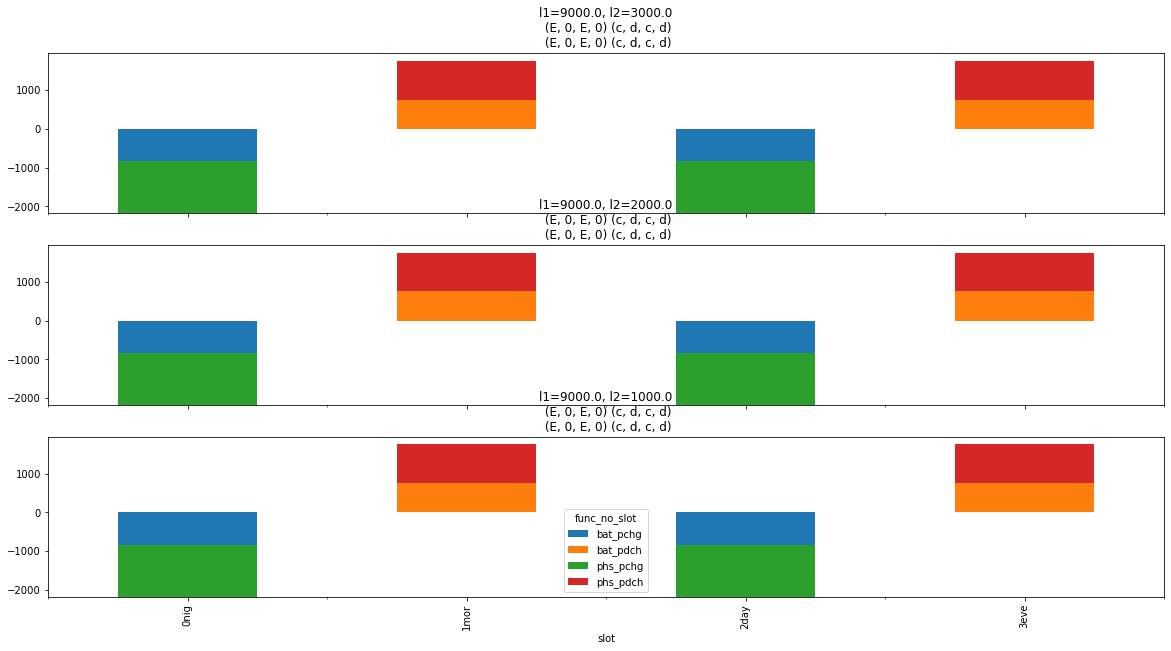

In [49]:
E_phs = 6000
E_bat = 4500
l_1mor = (8000, 9000)
l_2day = (1000, 4000)
excl = f'not (l_1mor == 8000 and l_2day == 4000)'

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f'and ec_bat_none == "0.0010" and interdep_class_id == 8')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)
excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' 
                           for l1, l2 in list_slct_l])


df_slct = plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none=0.001,
                       eff_bat_none=0.9, excl=excl)

### Example for cluster A: Panel g in figure 4

******************** bat_pchg_0nig ********************
E_bat_none*eff_bat_none**(-1.0)/w_none
******************** bat_pchg_2day ********************
E_bat_none*eff_bat_none**(-1.0)/w_none
******************** bat_pdch_1mor ********************
E_bat_none/w_none
******************** bat_pdch_3eve ********************
E_bat_none/w_none
******************** phs_pchg_0nig ********************
E_phs_none*eff_phs_none**(-1.0)/w_none
******************** phs_pchg_2day ********************
E_phs_none*eff_phs_none**(-1.0)/w_none
******************** phs_pdch_1mor ********************
E_phs_none/w_none
******************** phs_pdch_3eve ********************
E_phs_none/w_none


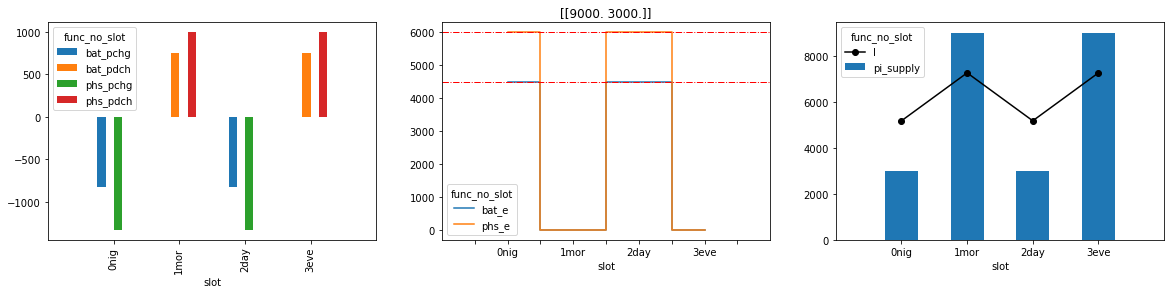

In [50]:
qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                f'and l_1mor == {9000} and l_2day == {3000} '
                f'and eff_bat_none == 0.9')
qry_str = qry_str_base + f'and ec_phs_none == 0.001'
df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                       ev.df_bal.query(qry_str)])

make_single_plots(df_single, E_bat, E_phs)

slct_idx = df_single.idx.unique()
assert len(slct_idx) == 1
m.print_results(slct_idx[0], 
                slct_var_mlt=['bat_pchg_0nig', 'bat_pdch_1mor', 'bat_pchg_2day', 'bat_pdch_3eve',
                              'phs_pchg_0nig', 'phs_pdch_1mor', 'phs_pchg_2day', 'phs_pdch_3eve']) 

## Cluster B with id=2: direct displacement BAT ⇒ PHS volume and timing


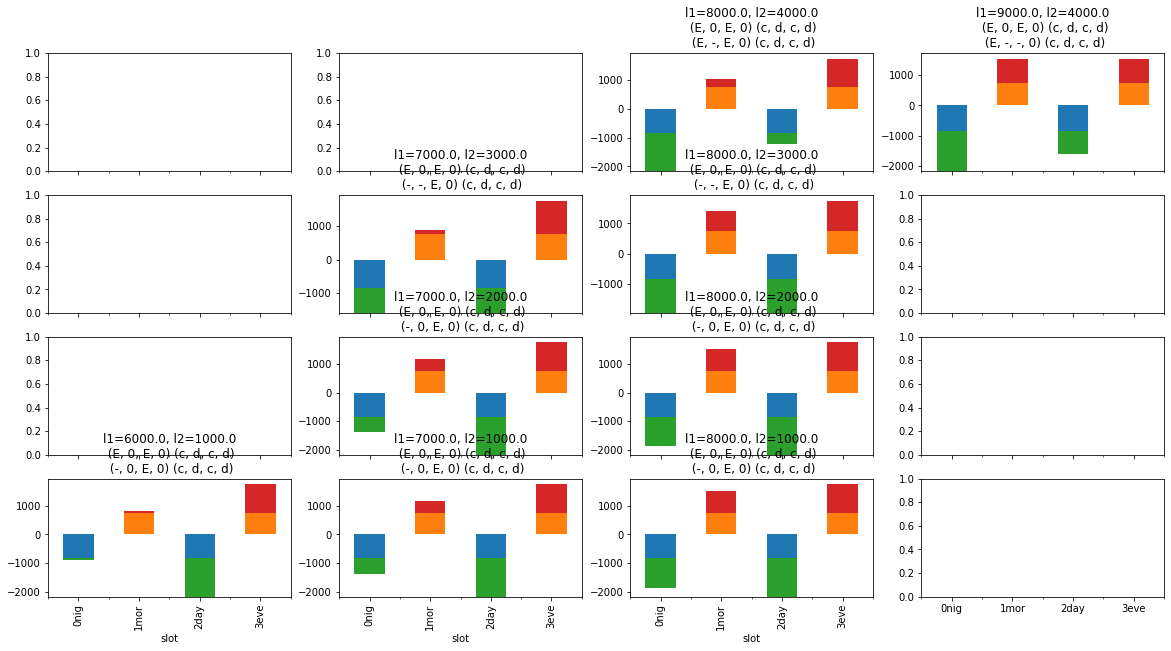

In [51]:
E_phs = 6000
E_bat = 4500
l_1mor = (5000, 9000)
l_2day = (1000, 5000)

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f' and eff_bat_none == 0.9'
                        f'and ec_bat_none == "0.0010" and interdep_class_id == 2')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)

excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])

df = plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none=0.0010, eff_bat_none=0.9, excl=excl, list_func_no_slot=['phs_pchg', 'phs_pdch', 'bat_pchg', 'bat_pdch'])

### Example for cluster B: Panel h in figure 4

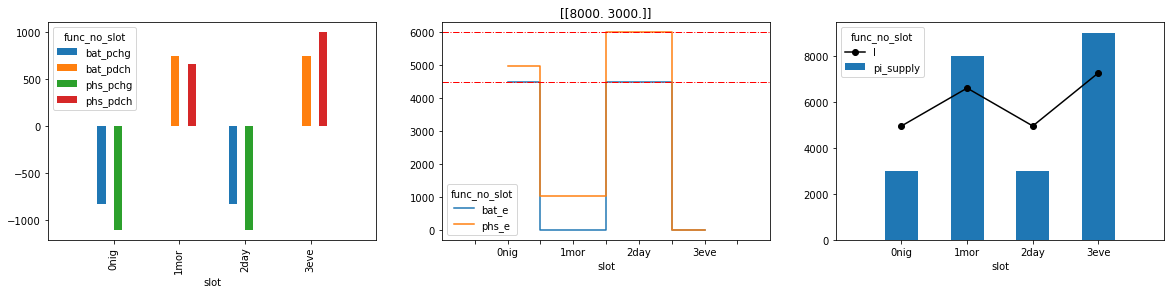

In [52]:
for l_1mor, l_2day in [(8000, 3000)]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')

    qry_str = qry_str_base + f'and ec_phs_none == 0.001'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)])

    _ = make_single_plots(df_single, E_bat, E_phs)


### Example solution illustrating the substitutions discussed in paper section 3.2.2.1, cluster B.

In [53]:
df_exp = ev.df_bal.query('l_1mor == "8000" and l_2day == "3000" and ec_phs_none == 0.001 and '
                         'eff_bat_none == 0.9 and E_phs_none == 6000 and E_bat_none == 4500')
m.print_results(df_exp.idx.tolist()[0], 
                substitute={'ec_bat_none': 0, 'ec_phs_none': 0},
                slct_var_mlt=['phs_pchg_0nig',
                             ])

******************** phs_pchg_0nig ********************
eff_bat_none**(-1.0)*(-E_bat_none*eff_bat_none**1.0*eff_phs_none**4.0 - E_bat_none*eff_phs_none**3.0 + E_phs_none*eff_bat_none**1.0*eff_phs_none**4.0 - eff_bat_none**1.0*eff_phs_none**3.0*l_0nig*w_none + eff_bat_none**1.0*eff_phs_none**4.0*l_1mor*w_none - eff_bat_none**1.0*eff_phs_none**5.0*l_0nig*w_none + eff_bat_none**1.0*eff_phs_none**5.0*l_2day*w_none)/(w_none*(eff_phs_none**3.0 + 2*eff_phs_none**5.0))


## Cluster C (index 8):  Second independence cluster

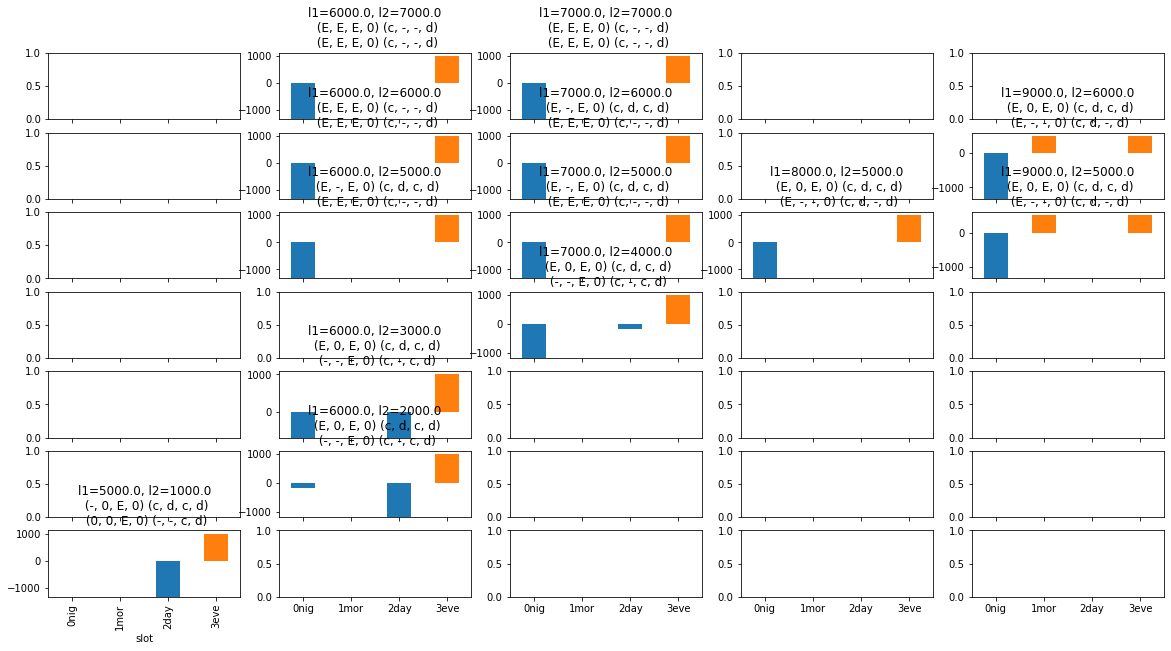

In [54]:
E_phs = 6000
E_bat = 4500
l_1mor = (5000, 9000)
l_2day = (1000, 7000)
eff_bat_none = 0.9
list_slct_l = set((ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} and eff_bat_none == {eff_bat_none} '
                        f'and ec_bat_none == "0.0001" and interdep_class_id in [8]')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)) - {(9000, 1000), (9000, 2000), (9000, 3000)}

excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])

df_slct = plot_cluster(E_phs, E_bat, l_1mor, l_2day, 0.001, eff_bat_none, excl, 
                      list_func_no_slot=['phs_pdch', 'phs_pchg'])

### Examples for cluster C: Panels e, f, and i in figure 4

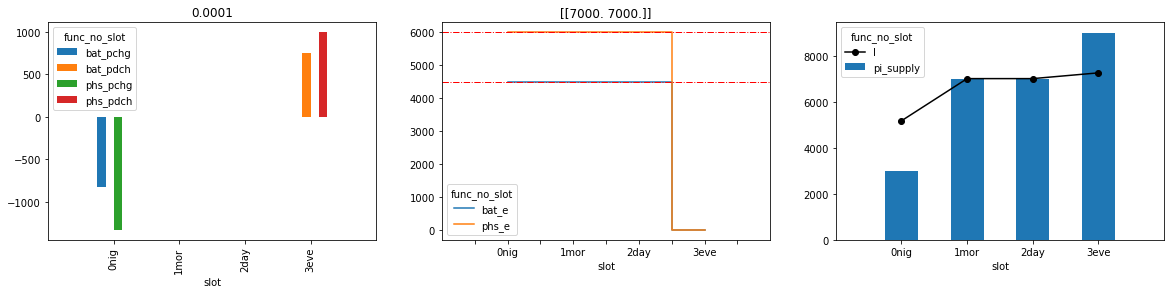

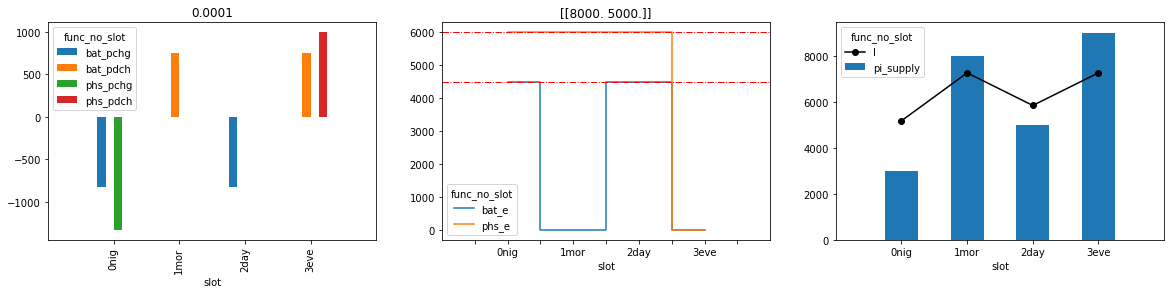

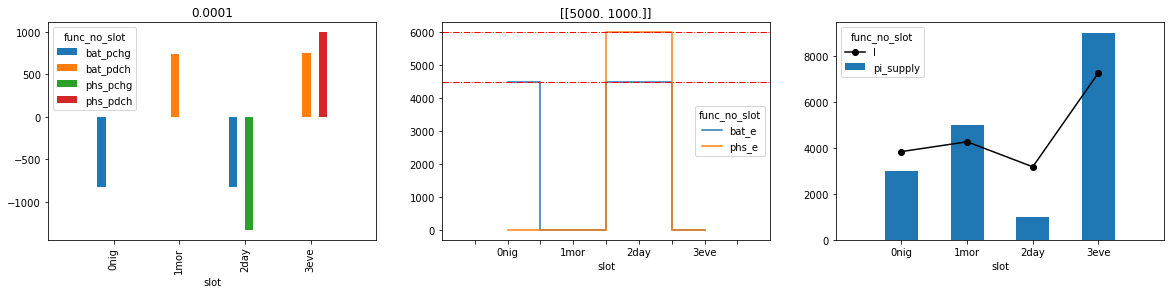

In [55]:
for l_1mor, l_2day in [(7000, 7000), (8000, 5000), (5000, 1000)]:
    ec_phs_none = 0.0001
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')

    qry_str = qry_str_base + f'and ec_phs_none == {ec_phs_none}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)])
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title(ec_phs_none)

## Cluster D (indices 4 and 1, depending on $\gamma_\mathrm{e,BAT} \gtrless \gamma_\mathrm{e,PHS}$): Mutual dependence of temporal patterns

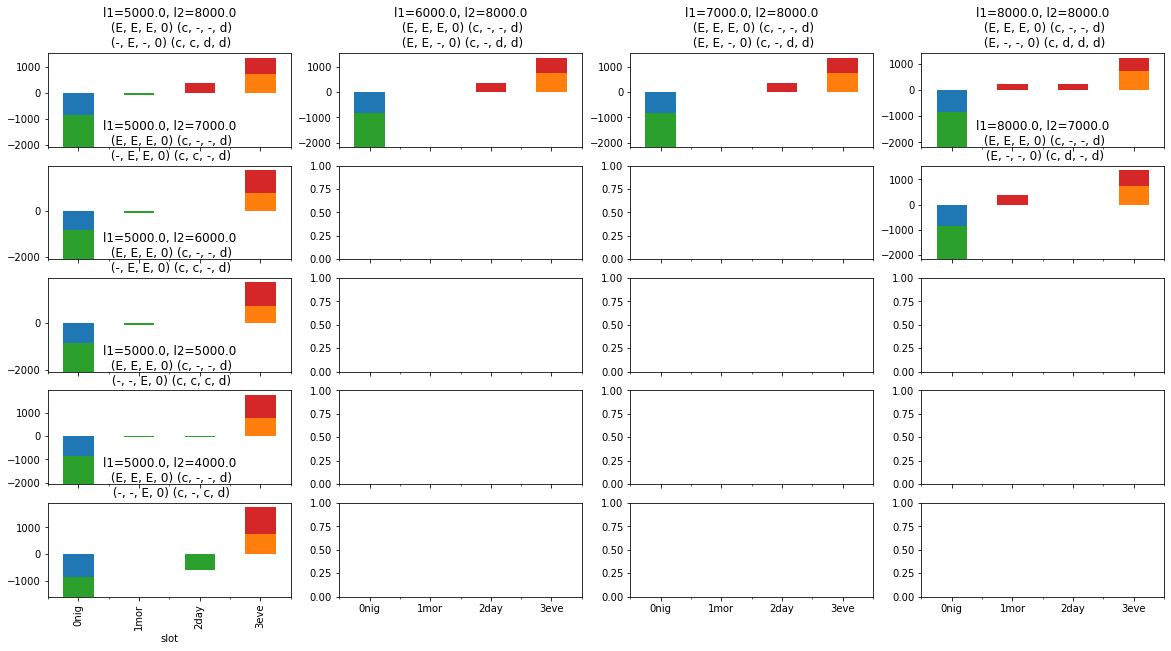

In [56]:
E_phs = 6000
E_bat = 4500
l_1mor = (5000, 8000)
l_2day = (4000, 8000)
ec_phs_none = 0.001
eff_bat_none = 0.9

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f'and eff_bat_none == 0.9 '
                        f'and ec_bat_none == "0.0001" ')#and interdep_class_id not in [8]')
              )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)

dict_slct_l = {5000: range(4000, 8001, 1000), 
               6000: [8000], 7000: [8000], 8000: [7000, 8000]}

list_slct_l = [(key, subval) for key, val in dict_slct_l.items() for subval in val]

excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])
df_slct =  plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none, eff_bat_none, excl)

### Examples for cluster D: Panels b and c in figure 4
For both $\Gamma_\mathrm{e}$ variations (model parameters `ec_phs_none` and `ec_bat_none`)

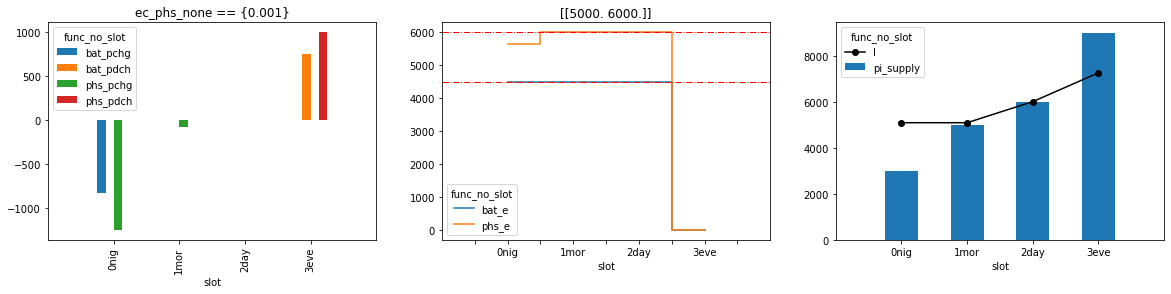

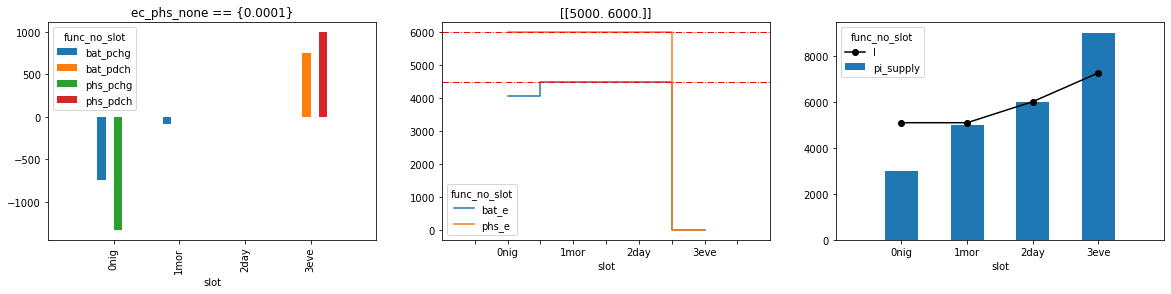

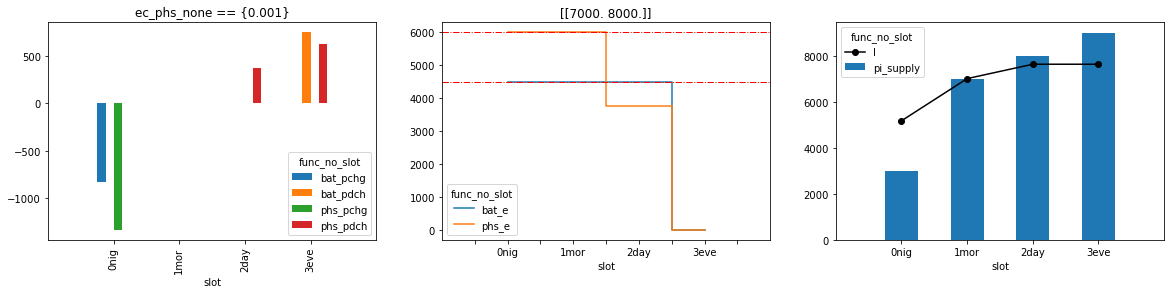

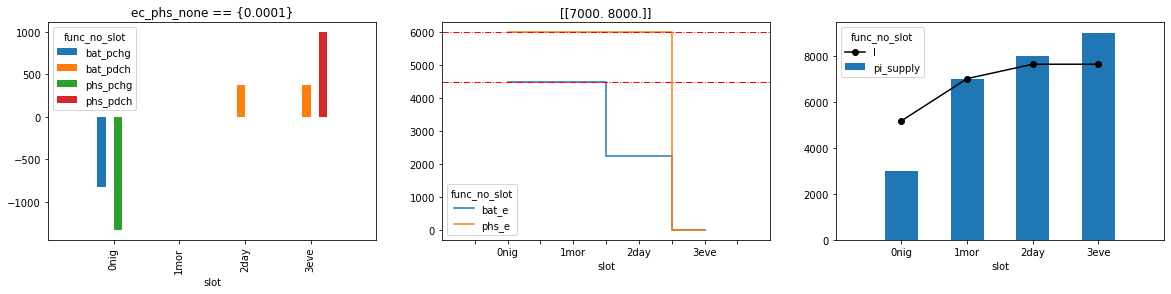

In [57]:
for l_1mor, l_2day in [(5000, 6000),(7000, 8000),]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == {0.9}')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)])
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.001}')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.0001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[df_single.drop('pwrerg', axis=1).columns], 
                           ev.df_bal.query(qry_str)])
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.0001}')

### Direct comparison of operation for different `ec_bat_none` ($\gamma_\mathrm{e,BAT}$) values.

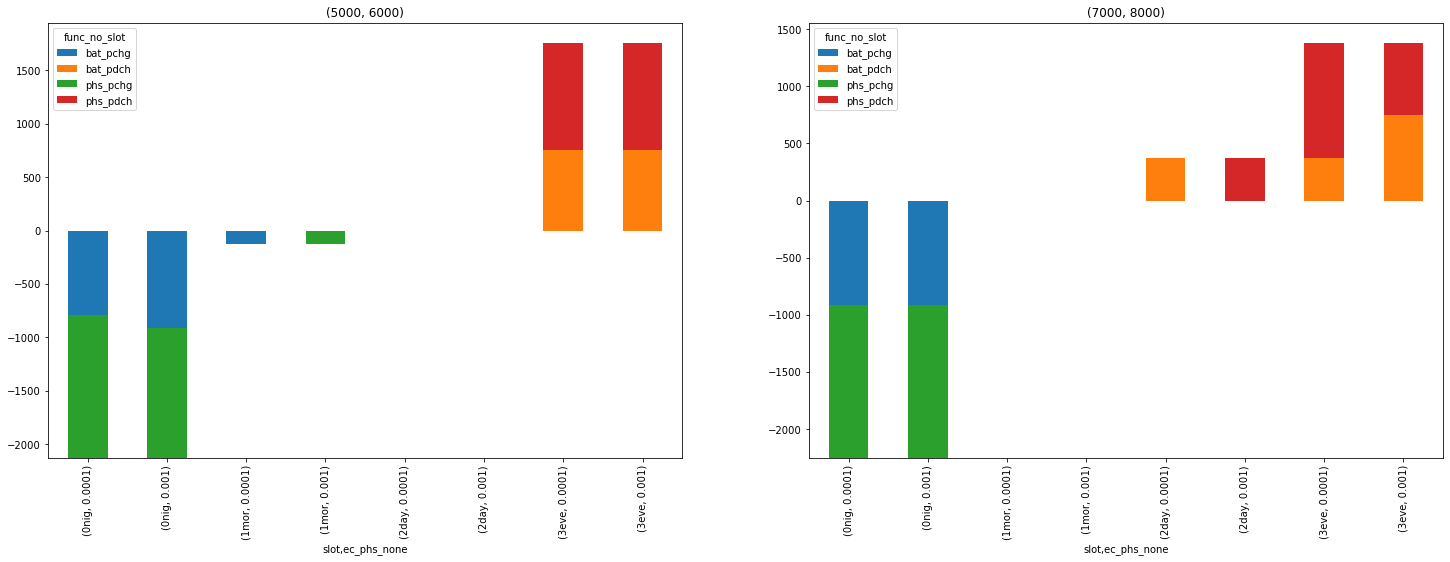

In [58]:
_, axarr = plt.subplots(1,2, figsize=(25,8), facecolor='w')
for ax, (l1, l2) in zip(axarr, sorted([(7000, 8000), (5000, 6000)])):
    ev.df_bal.query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l1} and l_2day == {l2} '
                    f'and func_no_slot in ["bat_pchg", "bat_pdch", "phs_pchg", "phs_pdch"]'
                   ).pivot_table(index=['slot', 'ec_phs_none'], columns='func_no_slot', values='lambd').plot.bar(stacked=True, ax=ax, 
                                                                                                                 title=str((l1, l2)))

### Exemplary solution (equation 13 in the paper)

In [59]:
ev.df_exp.query('idx in [1160, 2512]')

for idx in [1160, 2512]:
    print('#' * 30, idx)
    m.print_results(idx, slct_var_mlt=['bat_pchg_0nig', 'phs_pchg_0nig'],
                   substitute={'ec_bat_none': 0, 'ec_phs_none': 0})

############################## 1160
******************** bat_pchg_0nig ********************
E_bat_none*eff_bat_none**(-1.0)/(2*w_none) - E_phs_none*eff_phs_none**(-1.0)/(2*w_none) - l_0nig/2 + l_1mor/2
******************** phs_pchg_0nig ********************
E_phs_none*eff_phs_none**(-1.0)/w_none
############################## 2512
******************** bat_pchg_0nig ********************
E_bat_none*eff_bat_none**(-1.0)/w_none
******************** phs_pchg_0nig ********************
-E_bat_none*eff_bat_none**(-1.0)/(2*w_none) + E_phs_none*eff_phs_none**(-1.0)/(2*w_none) - l_0nig/2 + l_1mor/2


## Cluster E: Index 1 BAT => PHS timing

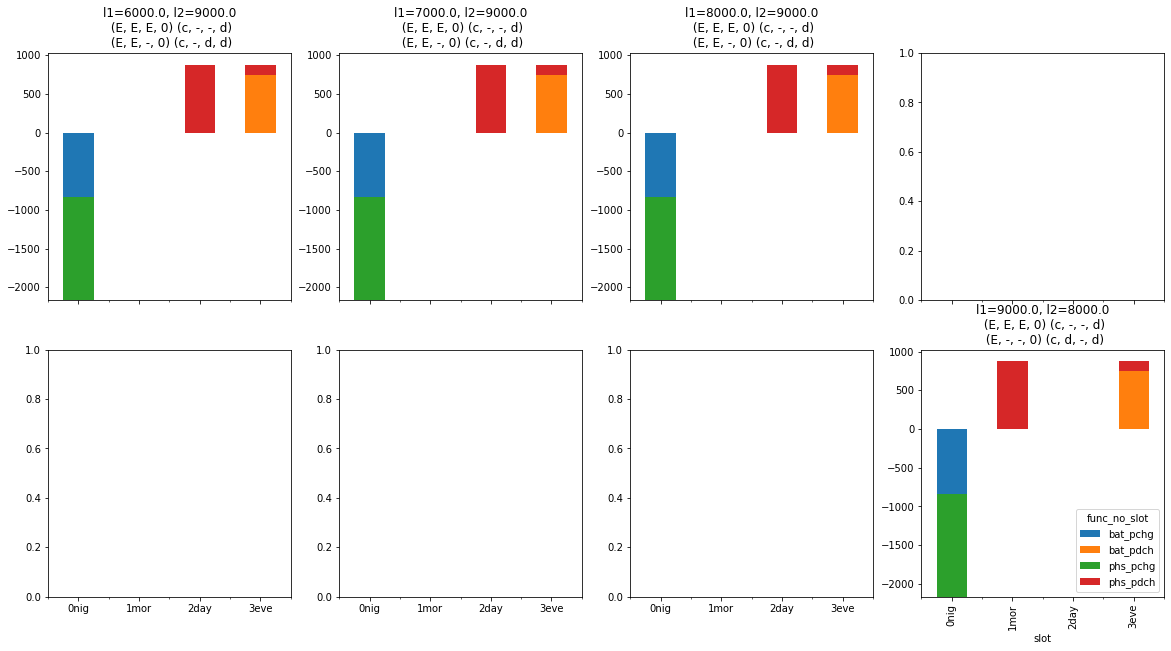

In [60]:
E_phs, E_bat, eff_bat_none = 6000, 4500, 0.9
l_1mor = (1000, 9000)
l_2day = (1000, 9000)

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f'and eff_bat_none == 0.9 '
                        f'and ec_bat_none == "0.001" and interdep_class_id in [1]')
              )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)
excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])
df_slct =  plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none, eff_bat_none, excl)

### Examples for cluster E: Panel a in figure 4
For both $\Gamma_\mathrm{e}$ variations (model parameters `ec_phs_none` and `ec_bat_none`)

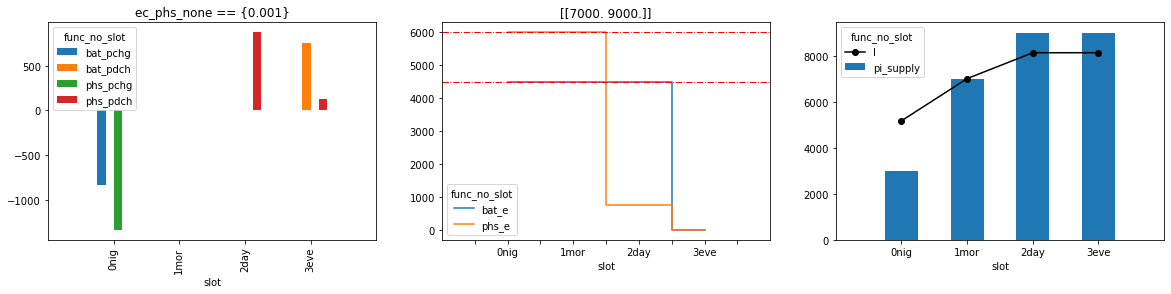

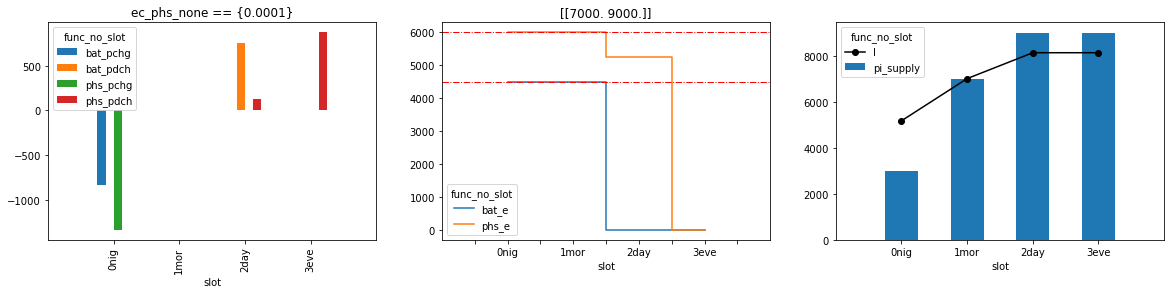

In [61]:
for l_1mor, l_2day in [(7000, 9000), ]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)])
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.001}')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.0001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[df_single.drop('pwrerg', axis=1).columns], 
                           ev.df_bal.query(qry_str)])
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.0001}')

### Closed-form expressions for this cluster

In [62]:
slct_rows = ev.df_bal.query(f'E_phs_none == {6000} and E_bat_none == {4500} '
                            f'and l_1mor == {7000} and l_2day == {9000} and '
                            f'slot == "global"')
slct_row_batlong = slct_rows.query('ec_bat_none == 0.001')
slct_row_phslong = slct_rows.query('ec_phs_none == 0.001')
idx_batlong, idx_phslong = slct_row_batlong.idx.tolist(), slct_row_phslong.idx.tolist()
assert len(set(idx_batlong)) == 1 and len(set(idx_phslong)) == 1, f'{idx_batlong}, {idx_phslong}'

slct_var_mlt=[f'{pp}_p{cd}_{slot}' 
              for pp in ['phs', 'bat'] for cd in ['chg', 'dch']
              for slot in ['0nig', '1mor', '2day', '3eve']] #+ ['pi_supply_0nig','pi_supply_1mor']

print('---> Expensive e batteries')
m.print_results(idx_phslong[0], substitute={'ec_phs_none': 0, 'ec_bat_none': 0}, slct_var_mlt=slct_var_mlt)
print('---> Expensive e PHS')
m.print_results(idx_batlong[0], substitute={'ec_phs_none': 0, 'ec_bat_none': 0}, slct_var_mlt=slct_var_mlt)

---> Expensive e batteries
******************** bat_pchg_0nig ********************
E_bat_none*eff_bat_none**(-1.0)/w_none
******************** bat_pchg_1mor ********************
0
******************** bat_pchg_2day ********************
0
******************** bat_pchg_3eve ********************
0
******************** bat_pdch_0nig ********************
0
******************** bat_pdch_1mor ********************
0
******************** bat_pdch_2day ********************
0
******************** bat_pdch_3eve ********************
E_bat_none/w_none
******************** phs_pchg_0nig ********************
E_phs_none*eff_phs_none**(-1.0)/w_none
******************** phs_pchg_1mor ********************
0
******************** phs_pchg_2day ********************
0
******************** phs_pchg_3eve ********************
0
******************** phs_pdch_0nig ********************
0
******************** phs_pdch_1mor ********************
0
******************** phs_pdch_2day ********************
(E_bat_none + E

### Direct comparison of operation for different `ec_bat_none` ($\gamma_\mathrm{e,BAT}$) values.

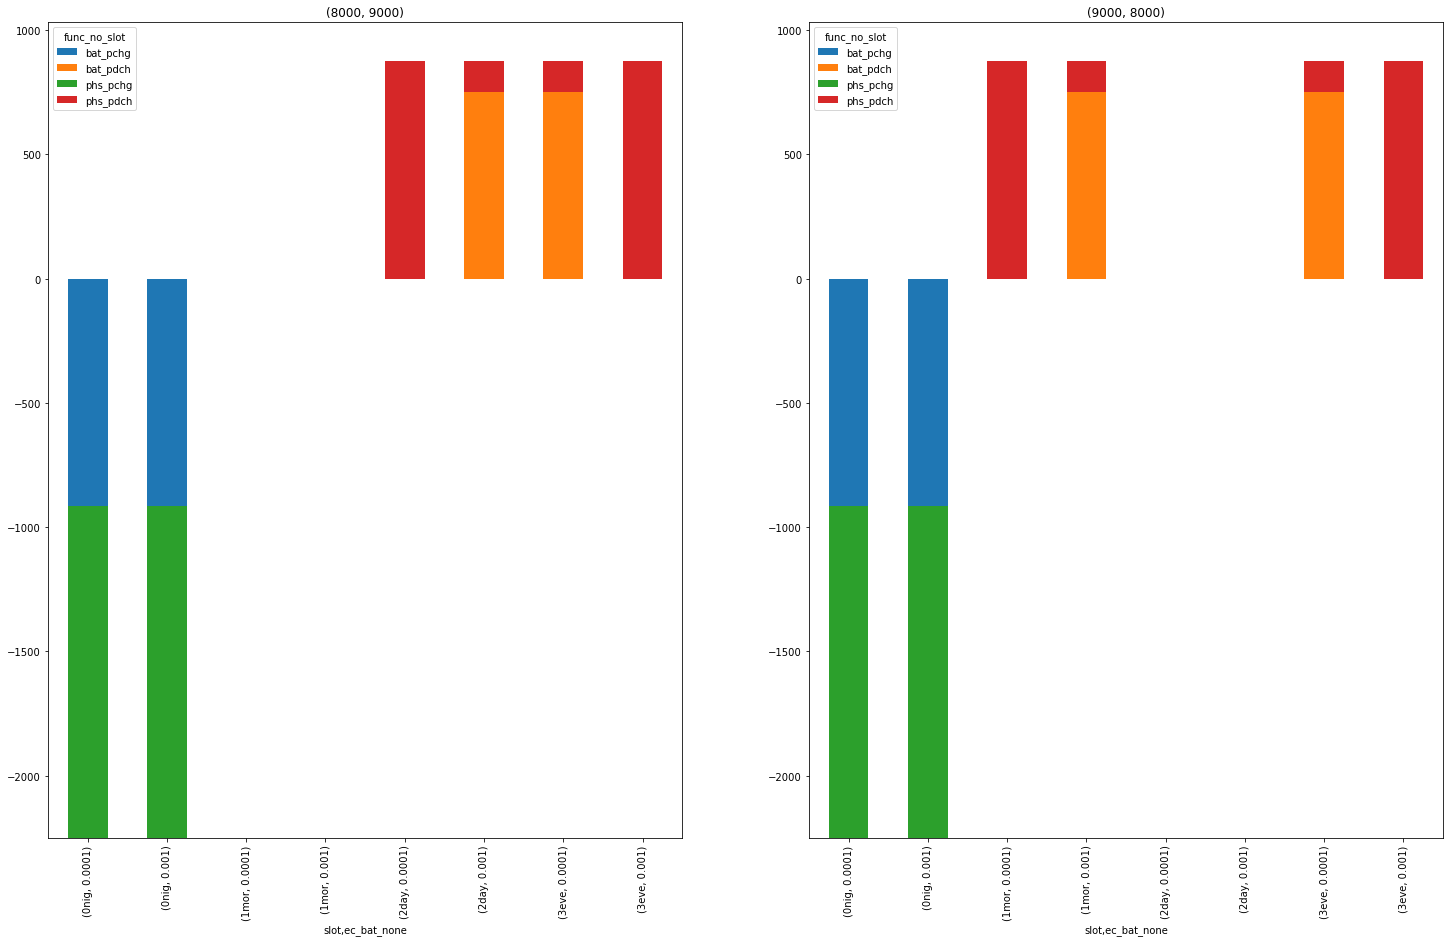

In [63]:
_, axarr = plt.subplots(1,2, figsize=(25,15), facecolor='w', )
for ax, (l1, l2) in zip(axarr, sorted([(8000, 9000), (9000, 8000)])):
    ev.df_bal.query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l1} and l_2day == {l2} '
                    f'and func_no_slot in ["bat_pchg", "bat_pdch", "phs_pchg", "phs_pdch"]'
                   ).pivot_table(index=['slot', 'ec_bat_none'], columns='func_no_slot', values='lambd').plot.bar(stacked=True, ax=ax, 
                                                                                                                 title=str((l1, l2)))


## Cluster F (index 13)

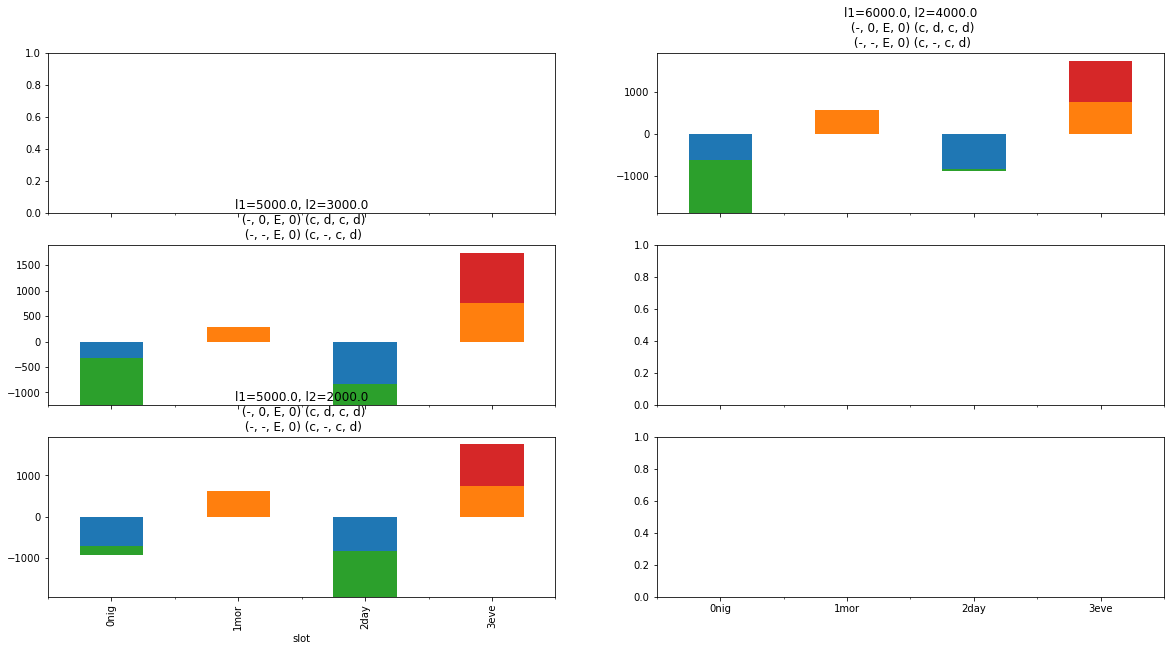

In [64]:
E_phs, E_bat = 6000, 4500
l_1mor, l_2day = (1000, 6000), (1000, 9000)
eff_batt_none = 0.9
ec_bat_none, ec_phs_none = 0.001, 0.0001

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f' and ec_bat_none == "0.0010" and interdep_class_id in [13]'
                        f' and eff_bat_none == 0.9')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)
excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' 
                           for l1, l2 in list_slct_l])
df_slct = plot_cluster(E_phs, E_bat, l_1mor, l_2day, ec_phs_none, 
                       eff_batt_none, excl, 
                       list_func_no_slot=["phs_pchg", "bat_pchg",
                                          "phs_pdch", "bat_pdch"])

### Example for cluster F: panel d in figure 4

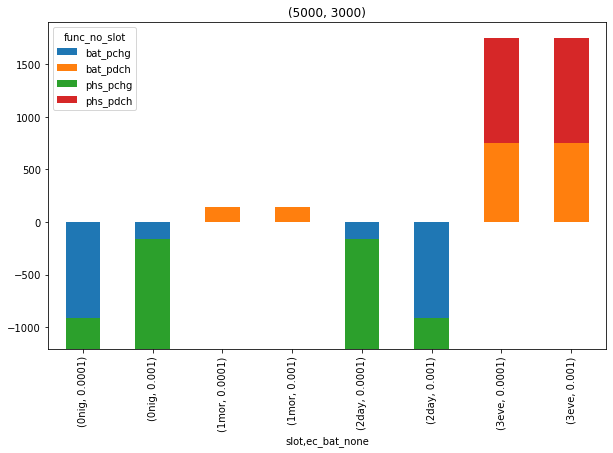

In [65]:
_, axarr = plt.subplots(1, 1, squeeze=False, figsize=(10,6), facecolor='w')
for ax, (l1, l2) in zip(axarr[0], sorted([(5000, 3000)])):
    ev.df_bal.query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l1} and l_2day == {l2} '
                    f'and func_no_slot in ["bat_pchg", "bat_pdch", "phs_pchg", "phs_pdch"]'
                   ).pivot_table(index=['slot', 'ec_bat_none'], columns='func_no_slot', values='lambd'
                                ).plot.bar(stacked=True, ax=ax, title=str((l1, l2)))


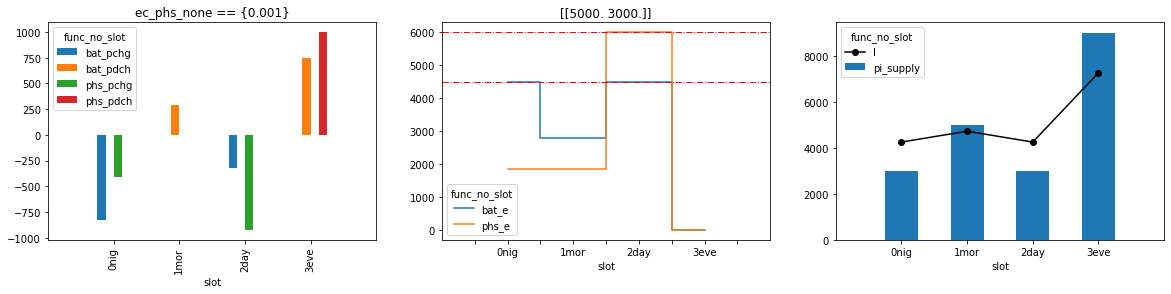

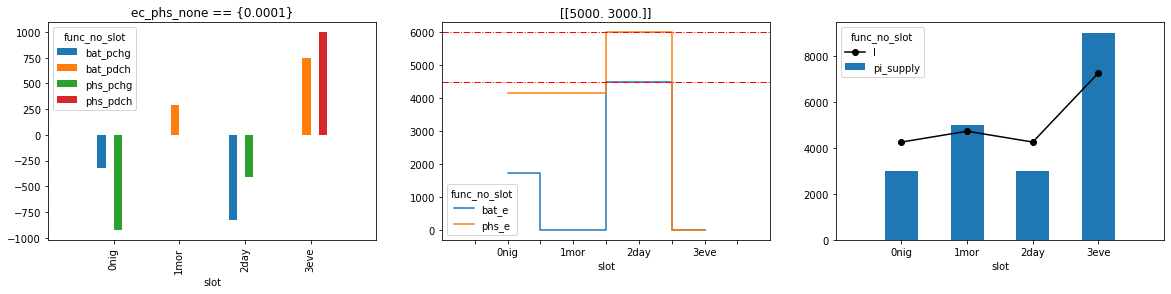

In [66]:
E_phs = 6000
E_bat = 4500
for l_1mor, l_2day in [(5000, 3000)]:#, (5000, 2000), (6000, 4000)]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)], sort=False)
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.001}')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.0001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[df_single.drop('pwrerg', axis=1).columns], 
                           ev.df_bal.query(qry_str)], sort=False)
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.0001}')


### Example closed-form solution

In [67]:
w = sp.symbols('w')
resdict = m.get_results_dict(df_single.idx.tolist()[0], slct_var_mlt=['bat_pchg_0nig', 'phs_pchg_0nig',
                                           'bat_pdch_1mor', 'phs_pdch_1mor',
                                           'bat_pchg_2day', 'phs_pchg_2day',
                                           'bat_pdch_3eve', 'phs_pdch_3eve'],
                       substitute={'ec_bat_none': 0, 'ec_phs_none': 0, 
                                  # 'w_0nig': w, 'w_1mor': w, 'w_2day': w, 'w_3eve': w
                                  })
sp.simplify(resdict['bat_pchg_0nig'])

eff_phs_none**(-1.0)*(-E_bat_none*eff_bat_none**3.0*eff_phs_none**1.0 - E_phs_none*eff_bat_none**4.0 - eff_bat_none**4.0*eff_phs_none**1.0*l_0nig*w_none - eff_bat_none**4.0*eff_phs_none**1.0*l_2day*w_none + 2*eff_bat_none**5.0*eff_phs_none**1.0*l_1mor*w_none)/(w_none*(eff_bat_none**4.0 + 2*eff_bat_none**6.0))

# Index 11 at higher capacities

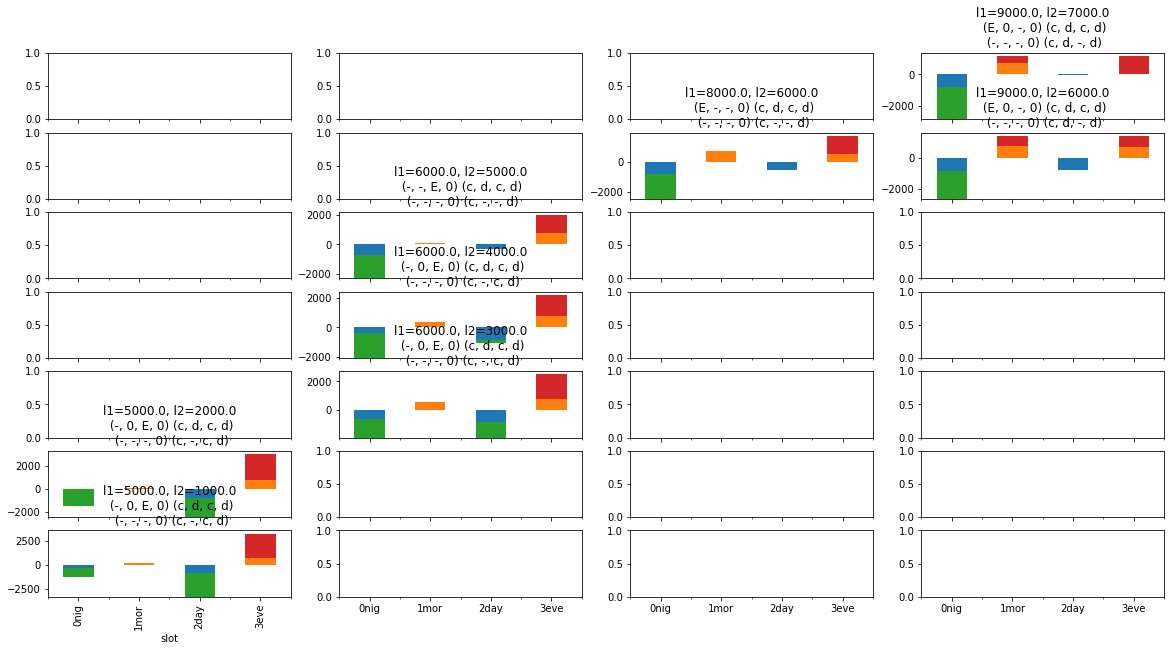

In [68]:
E_phs = 30000
E_bat = 4500
l_1mor = (1000, 9000)
l_2day = (1000, 9000)
eff_batt_none = 0.9
ec_phs_none = 0.0001

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f' and ec_bat_none == "0.0010" and interdep_class_id in [11]'
                        f' and eff_bat_none == 0.9')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)
excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])
df_slct = plot_cluster(E_phs, E_bat, l_1mor, l_2day, 
                       ec_phs_none, eff_batt_none, excl, list_func_no_slot=["phs_pchg", "bat_pchg", "phs_pdch", "bat_pdch"])

## Figure 10 example for index 11

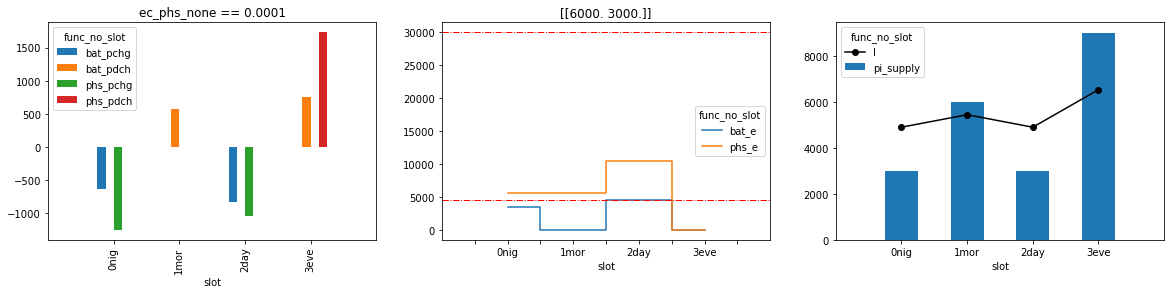

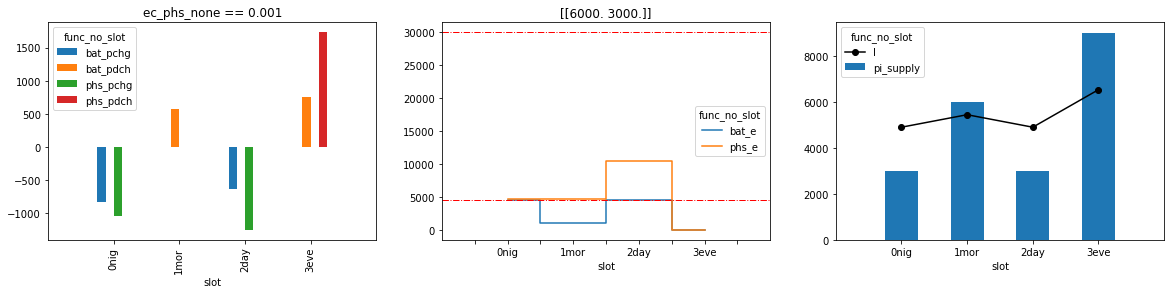

In [69]:
E_phs = 6000
E_bat = 9000
for (E_phs, E_bat), (l_1mor, l_2day) in [((30000, 4500), (6000, 3000)),
                                        ]:
    for ec_phs_none in [ 0.0001, 0.001]:
        qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                        f'and eff_bat_none == 0.9')

        qry_str = qry_str_base + f'and ec_phs_none == {ec_phs_none}'
        df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                               ev.df_bal.query(qry_str)], sort=False)
        axarr = make_single_plots(df_single, E_bat, E_phs)
        axarr[0].set_title(f'ec_phs_none == {ec_phs_none}')

## Check parameter dependencies of variables

In [70]:
slct_var_mlt =  ['bat_pchg_0nig', 'bat_pchg_1mor', 'bat_pchg_2day', 'bat_pchg_3eve', 
                 'bat_pdch_0nig', 'bat_pdch_1mor', 'bat_pdch_2day', 'bat_pdch_3eve', 
                 'phs_pchg_0nig', 'phs_pchg_1mor', 'phs_pchg_2day', 'phs_pchg_3eve', 
                 'phs_pdch_0nig', 'phs_pdch_1mor', 'phs_pdch_2day', 'phs_pdch_3eve',]
    
dct = m.get_results_dict(df_single.idx.unique().tolist()[0], slct_var_mlt=slct_var_mlt,
                         substitute={'ec_phs_none': 0, 'ec_bat_none': 0},)

{name: [symb for symb in res.free_symbols 
        if symb in m.comps['bat'].parameters('symb') + m.comps['phs'].parameters('symb')] for name, res in dct.items()}

{'bat_pchg_0nig': [E_bat_none, eff_bat_none],
 'bat_pchg_1mor': [],
 'bat_pchg_2day': [E_bat_none, eff_bat_none, eff_phs_none],
 'bat_pchg_3eve': [],
 'bat_pdch_0nig': [],
 'bat_pdch_1mor': [E_bat_none, eff_bat_none, eff_phs_none],
 'bat_pdch_2day': [],
 'bat_pdch_3eve': [E_bat_none],
 'phs_pchg_0nig': [E_bat_none, eff_bat_none, eff_phs_none],
 'phs_pchg_1mor': [],
 'phs_pchg_2day': [E_bat_none, eff_bat_none, eff_phs_none],
 'phs_pchg_3eve': [],
 'phs_pdch_0nig': [],
 'phs_pdch_1mor': [],
 'phs_pdch_2day': [],
 'phs_pdch_3eve': [E_bat_none, eff_bat_none, eff_phs_none]}

# Storage independence at high capacities (chapter 3.2.3.1)

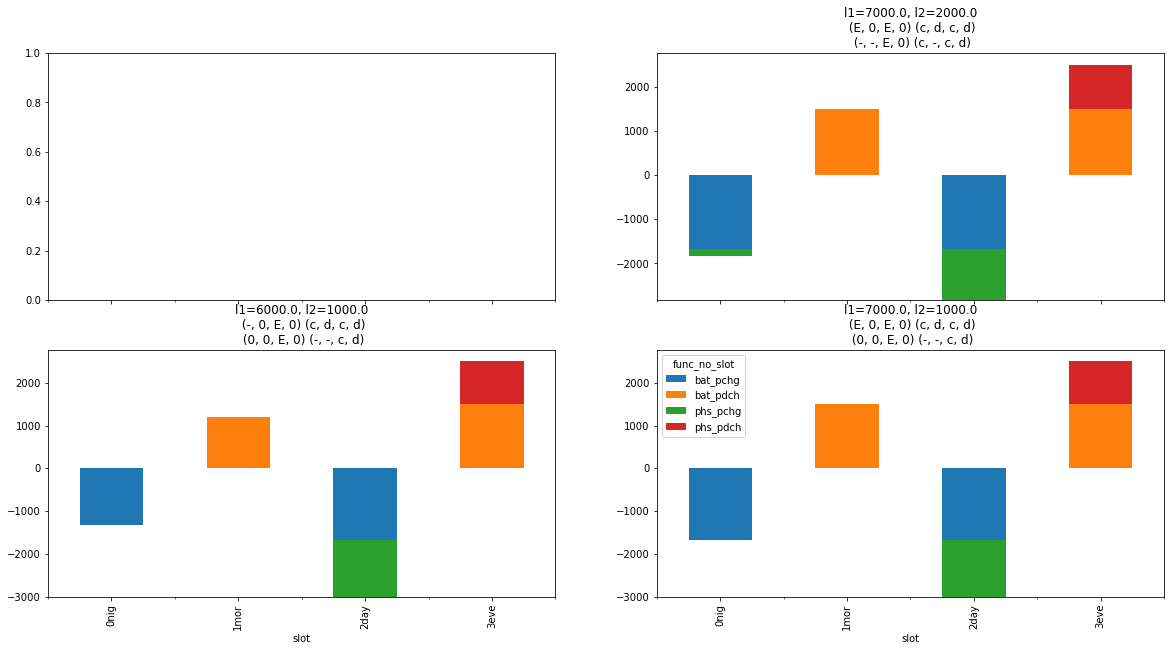

In [71]:
E_phs = 6000
E_bat = 9000
l_1mor = (1000, 9000)
l_2day = (1000, 9000)
eff_batt_none = 0.9
ec_phs_none = 0.0001

list_slct_l = (ev.df_bal.join(df_opt.set_index('idx').interdep_class_id, on='idx')
                 .query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                        f' and ec_bat_none == "0.0010" and interdep_class_id in [8]'
                        f' and eff_bat_none == 0.9')
          )[['l_1mor', 'l_2day']].drop_duplicates().apply(tuple, axis=1)
excl = '(%s)'%' or '.join([f'(l_1mor == {l1} and l_2day == {l2})' for l1, l2 in list_slct_l])
df_slct = plot_cluster(E_phs, E_bat, l_1mor, l_2day, 
                       ec_phs_none, eff_batt_none, excl, 
                       list_func_no_slot=["phs_pchg", "bat_pchg", "phs_pdch", "bat_pdch"])

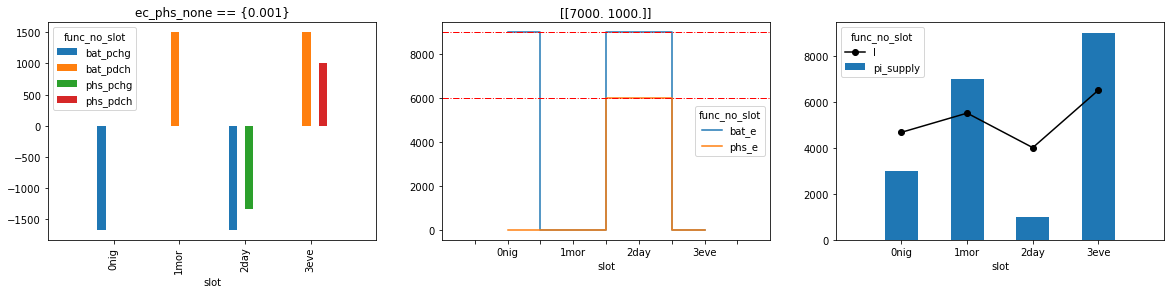

In [72]:
E_phs = 6000
E_bat = 9000
for l_1mor, l_2day in [(7000, 1000)]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)], sort=False)

    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title('ec_phs_none == {0.001}')

# Inverted average displacement pattern
Selected plots for the discussion in section 3.2.3.3 of the paper

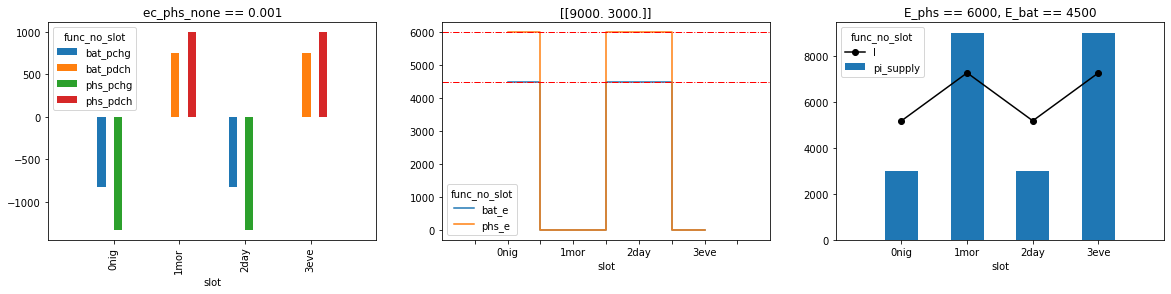

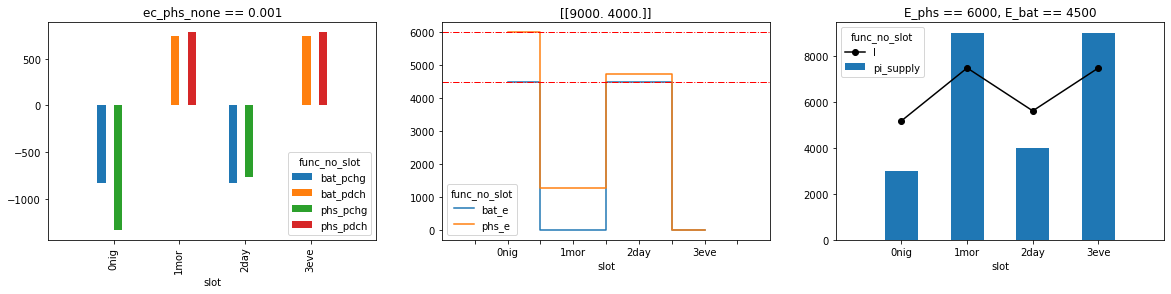

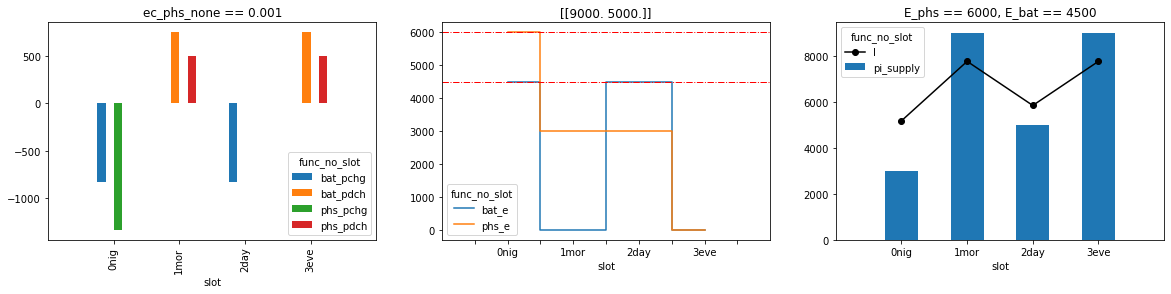

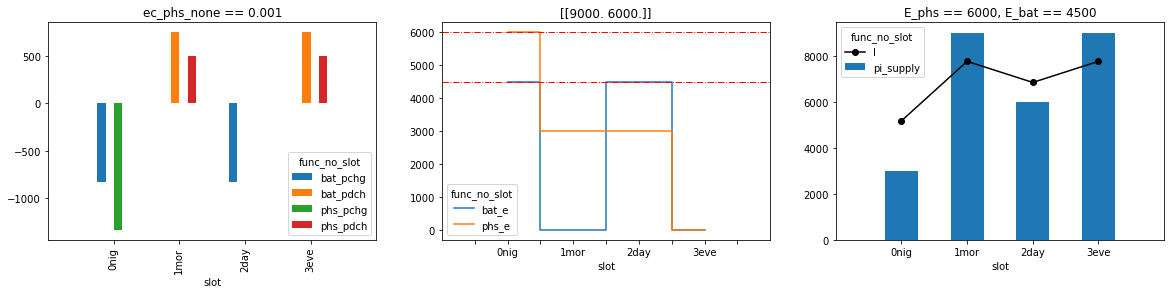

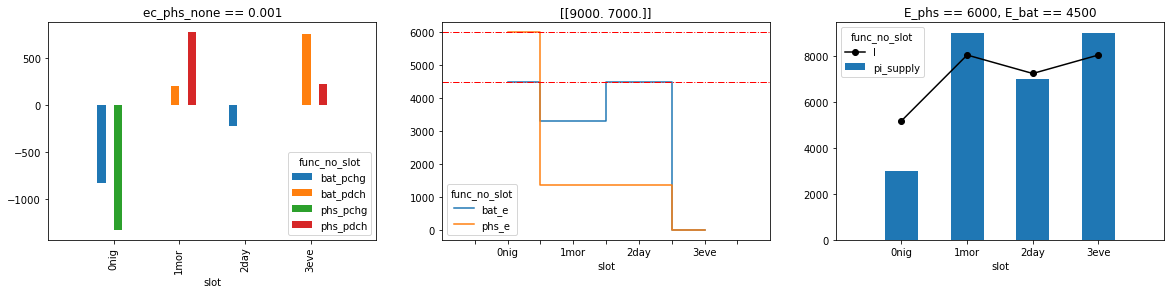

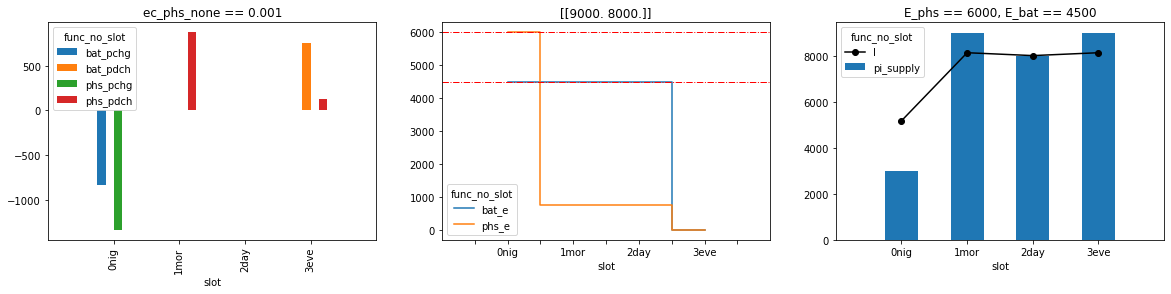

In [73]:
for (E_phs, E_bat), (l_1mor, l_2day) in [
                                         ((6000, 4500), (9000, 3000)),
                                         ((6000, 4500), (9000, 4000)),
                                         ((6000, 4500), (9000, 5000)),
                                         ((6000, 4500), (9000, 6000)),
                                         ((6000, 4500), (9000, 7000)),
                                         ((6000, 4500), (9000, 8000))]:
    qry_str_base = (f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                    f'and l_1mor == {l_1mor} and l_2day == {l_2day} '
                    f'and eff_bat_none == 0.9')
    
    qry_str = qry_str_base + f'and ec_phs_none == {0.001}'
    df_single = pd.concat([ev.df_exp.query(qry_str + ' and func_no_slot == "pi_supply"')[ev.df_exp.columns], 
                           ev.df_bal.query(qry_str)], sort=False)
    axarr = make_single_plots(df_single, E_bat, E_phs)
    axarr[0].set_title(f'ec_phs_none == {0.001}')
    axarr[2].set_title(f'E_phs == {E_phs}, E_bat == {E_bat}')

# Capacity factor of PHS

In support of paper section 3.3.2.2 "Capacity factor and storage displacement are generally not correlated."


In [74]:
E_bat = 4500
E_phs = 6000
slct_vars = ['phs_pdch']

df_cf = (ev.df_exp.loc[ev.df_exp.func_no_slot.isin(slct_vars)]
          .assign(pt=lambda x: x.func_no_slot.apply(lambda y: y.split('_')[0]))
          .assign(cap=lambda df: np.where(df.pt == "BAT", df.E_bat_none / 6, df.E_phs_none / 6))
          .groupby(ev.x_name + ['pt']).lambd.sum().reset_index()
          .assign(cap=lambda df: np.where(df.pt == "BAT", df.E_bat_none / 6, df.E_phs_none / 6))
          .assign(cf=lambda df: df.lambd / df.cap / 6) 
          )
df_cf
(df_cf.query(f'eff_bat_none == 0.9 and ec_phs_none == 0.001 and E_bat_none == {E_bat} and E_phs_none == {E_phs}')
     .pivot_table(index=['pt', 'E_phs_none', 'l_2day'], 
                  columns=['eff_bat_none', 'E_bat_none', 'l_1mor'], 
                  values='cf', aggfunc=sum).sort_index(ascending=False).style.apply(background_gradient, m=0, M=1)
)

# Efficiency impact
Impact (%) of lower BAT battery efficiency (not included in the paper).

In [75]:
df = (ev.df_exp.query('func_no_slot in ["phs_pdch", "bat_pdch"]'
                      f' and E_bat_none == 6000 and E_phs_none == 6000'
                      f' and ec_phs_none == 0.0001')
          ).pivot_table(index=['E_bat_none', 'E_phs_none', 'eff_phs_none', 'ec_phs_none', 'func_no_slot', 'l_2day'], 
                        columns=['eff_bat_none', 'l_1mor'], values='lambd', aggfunc=sum)
#df = df.loc[~df.isna().any(axis=1)]
df = (((df[0.751] - df[0.9])) ).round(0)

display(df.sort_index(level=['ec_phs_none', 'E_phs_none',  'E_bat_none', 'func_no_slot', 'l_2day'], 
                      ascending=False).style.apply(background_gradient, m=-100, M=100))


# Average specific displacement

In [76]:
# get relevant part of output data
df = ev.df_exp.query('is_optimum and func_no_slot in ["phs_pdch", "bat_pdch"] and '
                     'eff_bat_none == 0.9 and ec_bat_none == "0.0010"'
                    )[[c for c in ev.df_exp.columns if not c in m.constrs_cols_neq 
                      + ['mask_valid', 'map_sanitize', 'is_positive', 'is_optimum', 'func']]]

# merge data with reference data (zero BAT capacity)
df_ref = (df.query('E_bat_none == 0').drop(['idx', 'E_bat_none', 'eff_bat_none'], axis=1)
            .rename(columns={'lambd': 'lambd_ref'}))
df = pd.merge(df, df_ref).assign(lambd_diff=lambda x: (x.lambd - x.lambd_ref))

# pivot BAT and PHS
lambd_cols = {c for c in df.columns if c.startswith('lambd')}
dfpv = df.pivot_table(index=set(df.columns) - lambd_cols - {'slot', 'func_no_slot'},
                      columns='func_no_slot', values=lambd_cols, aggfunc=sum).reorder_levels([1, 0], axis=1)

# calculate specific displacement
dfpv['rel_replacement'] = (dfpv[('phs_pdch', 'lambd_diff')] / dfpv[('bat_pdch', 'lambd_diff')])

# filter
mask_nan = dfpv.rel_replacement.isin([-np.inf, np.inf, np.nan]) | dfpv.rel_replacement.isna()
mask_small = dfpv.rel_replacement.abs() < 1e-2
dfpv.loc[mask_nan | mask_small,  'rel_replacement'] = 0

# reshape for table display
Ebat = [4500, 6000, 9000, 15000]
df_pv = dfpv.query('E_bat_none in @Ebat').pivot_table(index=['ec_phs_none','E_phs_none',  'l_2day'],
                                       columns=['E_bat_none', 'eff_bat_none', 'l_1mor'], 
                                       values='rel_replacement', aggfunc=sum).round(2)

# display table
cm = sns.light_palette("green", as_cmap=True, reverse=False)
display(df_pv.sort_index(level=['ec_phs_none', 'E_phs_none', 'l_2day'], ascending=False).style.apply(background_gradient, cm=cm, m=-1, M=0))

# Specific marginal displacements
Calculate derivatives of closed-form solutions with respect to $\Gamma_\mathrm{e,BAT}$ (`m.comps['bat'].E.symb`)

In [63]:
list_slots = ['0nig', '1mor', '2day', '3eve']
df_marg_deriv_0 = df_opt[['idx', 'result']].copy()

In [64]:
multiproc_params['nworkers'] = 'default'
multiproc_params['chunks_per_worker'] = 1

def get_diff_E_bat(expr):
    return sp.simplify(sp.diff(expr.subs({m.comps['phs'].ec.symb: 0, 
                                          m.comps['bat'].ec.symb: 0}), m.comps['bat'].E.symb))

def apply_diff_E_bat(x, select_batphs):
    ''' Calculate derivative of charging/discharging with respect to E_bat'''
    select_p = {(key := f'{select_batphs}_p{cd}_{slot}'): 
                    get_diff_E_bat(x[key])
                for slot in list_slots for cd in ['chg', 'dch']}
    return select_p

def call_apply_diff_E_bat_phs(df): return df.result.apply(apply_diff_E_bat, select_batphs='phs')
def wrapper_call_apply_diff_E_bat_phs(df): return log_time_progress(call_apply_diff_E_bat_phs)(None, df, 'phs', len(df_marg_deriv_0))

def call_apply_diff_E_bat_bat(df): return df.result.apply(apply_diff_E_bat, select_batphs='bat')
def wrapper_call_apply_diff_E_bat_bat(df): return log_time_progress(call_apply_diff_E_bat_bat)(None, df, 'bat', len(df_marg_deriv_0))

df_marg_deriv_0['phs_diff'] = parallelize_df(df_marg_deriv_0, wrapper_call_apply_diff_E_bat_phs)
df_marg_deriv_0['bat_diff'] = parallelize_df(df_marg_deriv_0, wrapper_call_apply_diff_E_bat_bat)

df_marg_deriv_0

idx                                             result  \
0      21  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
1      22  {'bat_e_0nig': -w_none*(eff_bat_none**2.0*l_0n...   
2      23  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
3      24  {'bat_e_0nig': w_none*(-2*eff_bat_none**2.0*l_...   
4      25  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
..    ...                                                ...   
140  2671  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
141  2724  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   
142  2756  {'bat_e_0nig': 0, 'bat_e_1mor': 0, 'bat_e_2day...   
143  2757  {'bat_e_0nig': 0, 'bat_e_1mor': 0, 'bat_e_2day...   
144  2777  {'bat_e_0nig': E_bat_none, 'bat_e_1mor': E_bat...   

                                              phs_diff  \
0    {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
1    {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
2    {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
3    {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
4    {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
..                                                 ...   
140  {'phs_pchg_0nig': -eff_bat_none**(-1.0)*(eff_b...   
141  {'phs_pchg_0nig': -2*eff_bat_none**(-1.0)/(3*w...   
142  {'phs_pchg_0nig': 0, 'phs_pdch_0nig': 0, 'phs_...   
143  {'phs_pchg_0nig': eff_bat_none**(-1.0)*eff_phs...   
144  {'phs_pchg_0nig': -eff_bat_none**(-1.0)*(eff_b...   

                                              bat_diff  
0    {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  
1    {'bat_pchg_0nig': 0, 'bat_pdch_0nig': 0, 'bat_...  
2    {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  
3    {'bat_pchg_0nig': 0, 'bat_pdch_0nig': 0, 'bat_...  
4    {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  
..                                                 ...  
140  {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  
141  {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  
142  {'bat_pchg_0nig': 0, 'bat_pdch_0nig': 0, 'bat_...  
143  {'bat_pchg_0nig': 0, 'bat_pdch_0nig': 0, 'bat_...  
144  {'bat_pchg_0nig': eff_bat_none**(-1.0)/w_none,...  

[145 rows x 4 columns]

In [65]:
# check results
df_res = df_marg_deriv_0.set_index('idx').loc[2618]
slct_p = 'phs_pchg_0nig'
for name, res in df_res.apply(lambda x: x.get(slct_p, np.nan)).to_dict().items():
    print('*'*30, name, '*'*30)
    print(sp.simplify(res))

****************************** result ******************************
-E_bat_none*eff_bat_none**(-1.0)/(2*w_none) + E_phs_none*eff_phs_none**(-1.0)/(2*w_none) - l_0nig/2 + l_1mor/2
****************************** phs_diff ******************************
-eff_bat_none**(-1.0)/(2*w_none)
****************************** bat_diff ******************************
nan


In [66]:
df_marg_deriv_single = (df_marg_deriv_0.set_index('idx')[['phs_diff', 'bat_diff']]
                                      .rename_axis('cols0', axis=1)
                                      .apply(lambda x: x.apply(pd.Series).stack(), axis=1)
                                      .droplevel('cols0', axis=1)
                                      .rename_axis('func', axis=1)
                                      .stack()
                                      .rename('single_diff')
                                      .reset_index())
for i, col in enumerate(['plant', 'chgdch']):
    df_marg_deriv_single[col] = df_marg_deriv_single.func.apply(lambda x: x.split('_')[i])
    
df_marg_deriv_single['func_no_slot'] = df_marg_deriv_single.plant + '_' + df_marg_deriv_single.chgdch

df_marg_deriv_single

idx           func single_diff plant chgdch func_no_slot
0       21  phs_pchg_0nig           0   phs   pchg     phs_pchg
1       21  phs_pdch_0nig           0   phs   pdch     phs_pdch
2       21  phs_pchg_1mor           0   phs   pchg     phs_pchg
3       21  phs_pdch_1mor           0   phs   pdch     phs_pdch
4       21  phs_pchg_2day           0   phs   pchg     phs_pchg
...    ...            ...         ...   ...    ...          ...
2315  2777  bat_pdch_1mor           0   bat   pdch     bat_pdch
2316  2777  bat_pchg_2day           0   bat   pchg     bat_pchg
2317  2777  bat_pdch_2day           0   bat   pdch     bat_pdch
2318  2777  bat_pchg_3eve           0   bat   pchg     bat_pchg
2319  2777  bat_pdch_3eve    1/w_none   bat   pdch     bat_pdch

[2320 rows x 6 columns]

In [67]:
df_marg_deriv_single_eval = \
(ev.df_exp.query('is_optimum and func_no_slot in ["phs_pchg", "phs_pdch", "bat_pchg", "bat_pdch"]')
          .drop(['is_optimum', 'mask_valid', 'map_sanitize', 'lambd', 'is_positive'], axis=1)
          .join(df_marg_deriv_single.set_index(['idx', 'func'])[['chgdch', 'single_diff']], on=['idx', 'func']))

In [68]:
def subs_params(x):
    return x[f'single_diff'].subs({**ev.dict_param_values, **x[ev.x_name].to_dict()})

def call_subs_params(df): return df.apply(subs_params, axis=1)
def wrapper_call_subs_params(df): return log_time_progress(call_subs_params)(None, df, 'call_subs_params', len(df_marg_deriv_single_eval))
df_marg_deriv_single_eval['bat_diff_eval'] = parallelize_df(df_marg_deriv_single_eval, wrapper_call_subs_params)
df_marg_deriv_single_eval.head()

func  idx  l_0nig  l_1mor  l_2day  l_3eve  eff_phs_none  \
13434209  bat_pchg_0nig   21    3000  6000.0  6000.0    9000          0.75   
13434218  bat_pchg_0nig   21    3000  6000.0  6000.0    9000          0.75   
13435650  bat_pchg_0nig   22    3000  6000.0  6000.0    9000          0.75   
13435651  bat_pchg_0nig   22    3000  6000.0  6000.0    9000          0.75   
13435659  bat_pchg_0nig   22    3000  6000.0  6000.0    9000          0.75   

          eff_bat_none  ec_phs_none  ec_bat_none  E_phs_none  E_bat_none  \
13434209           0.9       0.0010       0.0001        6000     15000.0   
13434218           0.9       0.0001       0.0010        6000     15000.0   
13435650           0.9       0.0010       0.0001        6000     18000.0   
13435651           0.9       0.0010       0.0001        6000     21000.0   
13435659           0.9       0.0001       0.0010        6000     18000.0   

          slot func_no_slot chgdch                  single_diff  \
13434209  0nig     bat_pchg   pchg  eff_bat_none**(-1.0)/w_none   
13434218  0nig     bat_pchg   pchg  eff_bat_none**(-1.0)/w_none   
13435650  0nig     bat_pchg   pchg                            0   
13435651  0nig     bat_pchg   pchg                            0   
13435659  0nig     bat_pchg   pchg                            0   

              bat_diff_eval  
13434209  0.185185185185185  
13434218  0.185185185185185  
13435650                  0  
13435651                  0  
13435659                  0

##### Table 1: Aggregate discharging by plant, then calculate ratio of PHS/BAT
This shows the total marginal replacement of PHS operation due to BAT operation.
* The marginal replacement is almost perfectly independent of the `ec` parameter 

In [69]:
df_marg_deriv_single_eval_agg = (df_marg_deriv_single_eval.query('func_no_slot in ["bat_pdch", "phs_pdch"]')
                                                  .groupby(['idx', 'func_no_slot'] + ev.x_name)
                                                  .bat_diff_eval.sum().astype(float).reset_index())
df_marg_deriv_single_eval_agg = (df_marg_deriv_single_eval_agg.set_index(ev.x_name + ['idx', 'func_no_slot'])
                                                              .bat_diff_eval.unstack(level='func_no_slot'))
df_marg_deriv_single_eval_agg['phs_diff_eval_spec'] = (df_marg_deriv_single_eval_agg['phs_pdch']
                                                      # / df_marg_deriv_single_eval_agg['bat_pdch']
                                                      )

In [70]:
Ebat = [4500, 6000, 9000, 15000]
df_marg_deriv_eval_agg_pv = (df_marg_deriv_single_eval_agg.query(f'E_bat_none in {Ebat} and eff_bat_none == 0.9 '
                                                                 f' and ec_bat_none == 0.001')
                                         .pivot_table(index=['ec_phs_none', 'eff_bat_none', 'E_phs_none',  'l_2day'],
                                                      columns=['E_bat_none', 'l_1mor'], 
                                                      values='phs_diff_eval_spec', aggfunc=sum).round(2))
df_marg_deriv_eval_agg_pv = df_marg_deriv_eval_agg_pv.astype(float)
df_marg_deriv_eval_agg_pv[df_marg_deriv_eval_agg_pv.abs() < 1e-5] = 0

cm = sns.light_palette("green", as_cmap=True, reverse=False)
display(
df_marg_deriv_eval_agg_pv.sort_index(level=['ec_phs_none', 'E_phs_none', 'l_2day'], ascending=False).style.apply(background_gradient, cm=cm, 
                                                                          m=df_marg_deriv_eval_agg_pv.min().min()*1.2, 
                                                                          M=df_marg_deriv_eval_agg_pv.max().max()))

## Save as csv

In [71]:
df_csv = (df_marg_deriv_eval_agg_pv.round(2).stack().stack().rename('val').reset_index()
         .assign(E_phs_none_id=functools.partial(get_id_col, col='E_phs_none'),
                 E_bat_none_id=functools.partial(get_id_col, col='E_bat_none'),
                 l_2day_id=functools.partial(get_id_col, col='l_2day'),
                 l_1mor_id=functools.partial(get_id_col, col='l_1mor')))

int_cols = ['E_phs_none', 'l_2day', 'l_1mor', 'E_bat_none', 'E_phs_none_id', 'E_bat_none_id', 'l_1mor_id', 'l_2day_id']
df_csv.loc[:, int_cols] = df_csv.loc[:, int_cols].astype(int)

def to_csv(x):
    x.to_csv(f'DATA_OUT_CSV/marg_deriv_surf_phs{x.name[0]}_bat{x.name[1]}_ec{f"{x.name[2]:.4f}".replace(".", "p")}.csv', index=False)

df_csv.loc[~df_csv.val.isna()].groupby(['E_phs_none', 'E_bat_none', 'ec_phs_none']).apply(to_csv)


Empty DataFrame
Columns: []
Index: []

# Time shifts
Using the `storedisagg` library to analyze shifts in time scales

In [72]:
import multiprocessing as mp
import storedisagg as std

/home/martinsoini/.conda/envs/grimsel_symenergy_env/lib/python3.8/site-packages/tqdm/std.py:666: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [73]:
# data selection and reshape into form suitable for multiprocessing
Ebat = [4500, 6000, 9000, 15000]
dfg_0 = (ev.df_exp.loc[ev.df_exp.func_no_slot.isin(['phs_pchg', 'phs_pdch', 'bat_pchg', 'bat_pdch'])]
         .assign(t=lambda x: x.slot.apply(lambda y: 6*int(y.split('_')[-1][0])),
                 plant=lambda x: x.func_no_slot.apply(lambda y: y[:3]),
                 var=lambda x: x.func_no_slot.apply(lambda y: y[-3:])))
dfg_0 = dfg_0.loc[(dfg_0.eff_bat_none == 0.9)]
ind_cols = ev.x_name + ['plant']
dfg_0 = (dfg_0.pivot_table(index=ind_cols + ['t'], columns='var', values='lambd')
            .reset_index(['t']))

list_dfg_0 = [df for _, df in dfg_0.groupby(level=['l_1mor', 'l_2day', 'E_bat_none', 'E_phs_none', 'ec_bat_none'])]
max(map(len, list_dfg_0))

8

In [ ]:
eff_dict = {'bat': 0.9, 'phs': 0.75}
std.logger.setLevel('ERROR')
def run_std(x, name=None):
    ''' Instantiate the StDisaggregator class and run disaggregation. '''
    
    if name: pass
    elif isinstance(x, pd.DataFrame): name = x.name
    else: name, x = x

    plant_name = name[-1]
    eff = eff_dict[plant_name]
    try:
        tvd = std.StDisaggregator(x, eff=eff, kind='share', print_progress=False)
        tvd.run()
    except AssertionError as e:
        raise e

    return (tvd.df_step_evts.assign(**dict(zip(ind_cols, name))), 
            tvd.df_full_stacked.assign(**dict(zip(ind_cols, name))))

def apply_grouped(dfg_slct):
    return [run_std(df, name) for name, df in list(dfg_slct.groupby(level=ind_cols))]

with mp.Pool() as pool:
    res = pool.map(apply_grouped, list_dfg_0)

# join all result DataFrames
res_sep = zip(*itertools.chain.from_iterable(res))
df_step, df_full = (pd.concat(r, sort=True) for r in res_sep)

## Calculate weighted time difference indicator

In [75]:
df_step['wgt_time_diff_icd'] = df_step.time_diff_icd * 6 * df_step.comp_ichg
df_step_gp = df_step.reset_index(drop=True).groupby(ind_cols)

def get_weighted_time_diff(x): 
    return (x.wgt_time_diff_icd.sum() / x.comp_ichg.sum()
            if x.comp_ichg.sum() > 0 else np.nan)

df_step_wgt = df_step_gp.apply(get_weighted_time_diff).rename('time_diff_wgt').reset_index()

df_step_wgt_ref = (
    df_step_wgt.loc[df_step_wgt.E_bat_none == 0]
            .rename(columns={'time_diff_wgt': 'time_diff_wgt_ref'})
            .drop('E_bat_none', axis=1))

df_step_change = pd.merge(df_step_wgt, df_step_wgt_ref).query('plant == "phs"')
df_step_change['time_diff_wgt_change'] = df_step_change.time_diff_wgt.fillna(0) - df_step_change.time_diff_wgt_ref.fillna(0)
# check
df_step_change.query('E_phs_none == 6000 and E_bat_none == 4500 and eff_bat_none == 0.9 and ec_phs_none == 0.001').sort_values('time_diff_wgt_change').head()


l_0nig  l_1mor  l_2day  l_3eve  eff_phs_none  eff_bat_none  ec_phs_none  \
1214    3000  8000.0  7000.0    9000          0.75           0.9        0.001   
1250    3000  8000.0  8000.0    9000          0.75           0.9        0.001   
1574    3000  9000.0  8000.0    9000          0.75           0.9        0.001   
134     3000  5000.0  4000.0    9000          0.75           0.9        0.001   
1610    3000  9000.0  9000.0    9000          0.75           0.9        0.001   

      ec_bat_none  E_phs_none  E_bat_none plant  time_diff_wgt  \
1214       0.0001        6000      4500.0   phs      13.499988   
1250       0.0001        6000      4500.0   phs      13.499988   
1574       0.0001        6000      4500.0   phs       7.499988   
134        0.0001        6000      4500.0   phs      12.749993   
1610       0.0001        6000      4500.0   phs       8.499996   

      time_diff_wgt_ref  time_diff_wgt_change  
1214          17.999988             -4.500000  
1250          17.999988             -4.500000  
1574          11.999988             -4.500000  
134           16.499993             -3.750000  
1610          11.999988             -3.499992

## Plotting time shift table (figure 7c-d in the paper)

In [76]:
Ebat = [4500]
ecphs = 0.0010
ecbat = 0.0001
df_step_change_pv = df_step_change.query('E_bat_none in @Ebat ').pivot_table(
                                             index=['ec_phs_none',   'l_2day'],
                                                 columns=['E_phs_none', 'E_bat_none', 'l_1mor'], 
                                                 values='time_diff_wgt_change', aggfunc=sum).round(2)
df_step_change_pv = df_step_change_pv.sort_index(level=['ec_phs_none',  'l_2day'], ascending=False)

cm = sns.light_palette("green", as_cmap=True, reverse=False)
df_step_change_pv.style.apply(background_gradient, cm=cm, 
                              m=df_step_change_pv.min().min()*1.2, 
                              M=df_step_change_pv.max().max())


## Save to csv

In [77]:
Ebat = [4500,]
df_slct = (df_step_change.query(f'E_bat_none in {Ebat}')
                          .pivot_table(index=['ec_phs_none','E_phs_none',  'l_2day'],
                                       columns=[ 'E_bat_none', 'l_1mor'], 
                                       values='time_diff_wgt_change', aggfunc=len).round(2))

#
df_csv = (df_slct.round(2).stack().stack().rename('val').reset_index()
         .assign(E_phs_none_id=functools.partial(get_id_col, col='E_phs_none'),
                 E_bat_none_id=functools.partial(get_id_col, col='E_bat_none'),
                 ec_phs_none_id=functools.partial(get_id_col, col='ec_phs_none'),
                 l_2day_id=functools.partial(get_id_col, col='l_2day'),
                 l_1mor_id=functools.partial(get_id_col, col='l_1mor'))
         )
int_cols = ['E_phs_none', 'l_2day', 'l_1mor', 'E_bat_none', 'E_phs_none_id', 'E_bat_none_id', 'l_1mor_id', 'l_2day_id']
df_csv.loc[:, int_cols] = df_csv.loc[:, int_cols].astype(int)

def to_csv(x):
    x.to_csv(f'DATA_OUT_CSV/time_shift_surf_phs{x.name[0]}_bat{x.name[1]}_ec{f"{x.name[2]:.4f}".replace(".", "p")}.csv', index=False)

df_csv.loc[~df_csv.val.isna()].groupby(['E_phs_none', 'E_bat_none', 'ec_phs_none']).apply(to_csv)

Empty DataFrame
Columns: []
Index: []

# Full displacement starts at the center (section 3.2.3.5)

In [78]:
reload(evaluator)
evaluator.THRESHOLD_UNEXPECTED_ZEROS = 1e-10

multiproc_params['nworkers'] = 'default'
logger.setLevel('INFO')
x_vals = {m.slots['0nig'].l: [3000],
             m.slots['1mor'].l: np.linspace(5000, 9000, 5), 
             m.slots['2day'].l: np.linspace(1000, 9000, 9),
             m.slots['3eve'].l: [9000],

             m.comps['phs'].eff: [0.75],
             m.comps['bat'].eff: [0.9],
    
             m.comps['phs'].ec: [1e-3, 1e-4],
             m.comps['bat'].ec: [1e-3, 1e-4],

             m.comps['phs'].E: [6000],
             m.comps['bat'].E: np.linspace(12070, 12100, 4)#list(np.linspace(9000, 15000, 3)) + [0, 1500.0, 4500.0, 6000.0] #+ list(np.linspace(20000, 30000, 2))
            }

ev_full_displacement = evaluator.Evaluator(m, x_vals, drop_non_optimum=True)
ev_full_displacement.get_evaluated_lambdas_parallel()

logger.setLevel('INFO')
multiproc_params['nworkers'] = 1
# delete cases where ec same for both storage types
ev_full_displacement.df_x_vals = ev_full_displacement.df_x_vals.copy().loc[ev_full_displacement.df_x_vals.ec_bat_none != ev_full_displacement.df_x_vals.ec_phs_none]

ev_full_displacement.expand_to_x_vals_parallel()
ev_full_displacement.build_supply_table()

> 23:22:20 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/lBE49E4709644.pickle.
> 23:22:20 - WARNING - symenergy.auxiliary.io - Please delete this file to re-evaluate: Evaluator.cache_lambd.delete()
> 23:22:20 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - **********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - *********************************************************************
> 23:22:20 - WARNING - symenergy.auxiliary.io - Loading from 

In [79]:
df_opt_fd = get_df_opt(ev=ev_full_displacement, m=m, delete_cache=False)
df_opt_fd = add_cross_map(df_opt_fd)

# auxiliary columns
df_opt_fd = pd.merge(df_opt_fd.loc[:, ~df_opt_fd.columns.isin(m.constrs_cols_neq)], 
                  m.df_comb[['idx'] + m.constrs_cols_neq], on='idx', how='left')
df_opt_fd = add_operation(df_opt_fd, m.slots)
df_opt_fd = df_opt_fd.join(ev.df_exp.query('is_optimum').groupby(['idx'])
                             .apply(lambda df: len(df[ev.x_name].drop_duplicates()))
                             .rename('count_solutions_per_idx'), on='idx')
df_opt_fd, dict_interdep_id_fd = add_cross_name(df_opt_fd)

df_interdep_map_fd = get_interdep_map(ev_full_displacement, df_opt_fd)

ec_impact_mask_fd = get_ec_impact_mask(ev_full_displacement, index=['E_phs_none', 'eff_bat_none', 'l_2day'])

df = df_interdep_map#.loc[(df_interdep_map.E_bat_none.isin([12080, 12090]))
                    #    & (df_interdep_map.eff_bat_none == 0.9)]

df_slct_noec_fd_0, df_slct_noec_fd = draw_interdep_heatmap(df_interdep_map_fd, ec_impact_mask_fd,
                                                           dict_interdep_id_fd, qry_Ebat_slct='E_bat_none > 12070')


> 23:22:25 - WARNING - symenergy.auxiliary.io - *************************************************************
> 23:22:25 - WARNING - symenergy.auxiliary.io - *************************************************************
> 23:22:25 - WARNING - symenergy.auxiliary.io - Loading from cache file .../2storages/opt317B9BDCE53F.pickle.
> 23:22:25 - WARNING - symenergy.auxiliary.io - *************************************************************
> 23:22:25 - WARNING - symenergy.auxiliary.io - *************************************************************


NameError: name 'add_operation' is not defined

## $l_\mathrm{day}$-dependence for $\Gamma_\mathrm{e,BAT}=12090\,\mathrm{MW}$

In [80]:
E_phs = 6000
E_bat = 12090
l_1mor = 7000
l_2day = [3000, 4000, 5000, 6000, 7000, 8000]

dfplot = ev_full_displacement.df_bal.query(f'E_phs_none == {E_phs} and E_bat_none == {E_bat} '
                                f'and l_1mor == {l_1mor} and l_2day in {l_2day}'
                                f' and slot != "global" and func_no_slot not in ["bat_e", "phs_e"]'
               )
fig = px.bar(dfplot, x='l_2day', y='lambd',
       facet_col='slot', facet_row='ec_bat_none', color='func_no_slot', height=800)
fig